In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import math
import random
import pprint
import numpy as np
import cv2
sys.path.append('../..')

from mrcnn.utils       import command_line_parser, Paths
from mrcnn.visualize   import display_images
from mrcnn.dataset     import Dataset
from mrcnn.datagen     import load_image_gt
from importlib         import reload
from mrcnn.newshapes2  import NewImagesDataset
import mrcnn.prep_notebook as prep
import mrcnn.visualize     as visualize
import mrcnn.visualize_2   as vis2
import mrcnn.utils         as utils

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
 
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = command_line_parser()
input_parms = " --batch_size 1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --mrcnn_model    last "
input_parms +=" --scale_factor     1"
input_parms +=" --sysout        screen "
input_parms +=" --new_log_folder   "
print(input_parms)
args = parser.parse_args(input_parms.split())
config = prep.build_newshapes_config(model = 'mrcnn', args = args, mode = 'training', verbose= 0)
# config.display()

Using TensorFlow backend.


 --batch_size 1   --mrcnn_logs_dir train_mrcnn_newshapes  --mrcnn_model    last  --scale_factor     1 --sysout        screen  --new_log_folder   
>>> Initialize Paths
 System Platform:  Windows


In [2]:
# del dataset_test
# pp.pprint(sys.modules)
# reload(mrcnn.Image)
# from mrcnn.Image import Image
# from IPython.lib.deepreload import reload
# reload(MyPak) 
# pp.pprint(sys.modules)

In [3]:
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_train, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_val, outfile)

In [307]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%10d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [349]:
# del NewImagesDataset
try:
    del sys.modules['mrcnn.newshapes2'],sys.modules['mrcnn.Image']
except:
    pass
from mrcnn.newshapes2 import NewImagesDataset


 Init Class - Possible Object Choices:  {'person': 5, 'building': 3, 'truck': 3, 'airplane': 3, 'car': 3, 'cloud': 3, 'sun': 1, 'tree': 5}
 Init Class - Custom Color Keys:  ['person', 'sky', 'cloud', 'ground', 'sun', 'tree']


In [345]:
try:
    del dataset_test
except:
    print(' dataset_test doesnt exist ')

dataset_test  = NewImagesDataset(config)

Active Class Info in  mrcnn
------------------------------------
[   {'category': 'background', 'id': 0, 'img_count': 0, 'name': 'BG', 'source': ''},
    {'category': None, 'id': 1, 'img_count': 0, 'name': 'person', 'source': 'newshapes'},
    {'category': None, 'id': 2, 'img_count': 0, 'name': 'car', 'source': 'newshapes'},
    {'category': None, 'id': 3, 'img_count': 0, 'name': 'sun', 'source': 'newshapes'},
    {'category': None, 'id': 4, 'img_count': 0, 'name': 'building', 'source': 'newshapes'},
    {'category': None, 'id': 5, 'img_count': 0, 'name': 'tree', 'source': 'newshapes'},
    {'category': None, 'id': 6, 'img_count': 0, 'name': 'cloud', 'source': 'newshapes'},
    {'category': None, 'id': 7, 'img_count': 0, 'name': 'airplane', 'source': 'newshapes'},
    {'category': None, 'id': 8, 'img_count': 0, 'name': 'truck', 'source': 'newshapes'}]


In [346]:
dataset_test.load_images(50, verbose = False)
dataset_test.prepare()

 Dataset test currently has : 0  images defined...
 Adding  50 images
 Add image --->  0
-----------------------------
 Initial Number of objects for image:  8
 Initial list of selected objects for image:  ['sun', 'car', 'tree', 'person', 'car', 'cloud', 'person', 'cloud']

===> Image:  0  build_test_add_object() -  TREE   Image currently has  0   shapes
 Build Tree
   Horizon           :  55
   lowest   building :  55  highest   building : 128
   leftmost building :  128  rightmost building : 0
   lowest   tree     :  55  highest   tree     : 128
   leftmost tree     :  128  rightmost tree     : 0
   lowest   car      :  55  highest   car      : 128
   leftmost car      :  128  rightmost car      : 0
   First Tree       :  (0, 0)
   dflt min rage    :  46  dflt max range    :  73
   First Tree - CY range: [ 46 73  ]     CX Range: [  0 128 ] 
   CY between    :[ 46 73 ]  CX between : [ 0 128  ]
   CX:  111 CY:  57
   After Interpolation SX:  4 SY:  17
   ====> get_pairwise_occlusion_ra

        Occlusion list: [0.1628 0.0000]

===> Image:  1  build_test_add_object() -  SUN   Image currently has  5   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 5

     Newshape: 
           Shape: SUN               CY:   8   CX:  71  Top:  4  Bot:  12 Left:  67 Right:  75  area:    49.00    dims:(71, 8, 4, 4)

     Previous objects : 5
        0  Shape: TRUCK             CY:  94   CX:  43  Top: 83  Bot: 105 Left:  10 Right:  76  area:   906.00    dims:[43 94 33 11]
        1  Shape: CLOUD             CY:  19   CX: 107  Top: 11  Bot:  27 Left:  66 Right: 148  area:   900.00    dims:[107 19 41 8]
        2  Shape: PERSON            CY:  81   CX:  66  Top: 70  Bot:  92 Left:  64 Right:  68  area:    86.00    dims:[66 81 2 11]
        3  Shape: CLOUD             CY:  24   CX:  36  Top: 14  Bot:  34 Left:  -4 Right:  76  area:  1325.00    dims:[36 24 40 10]
        4  Shape: PERSON            CY:  84   CX:  35  Top: 73  Bot:  95 Left:  33 Right:  37  area:    86.00 


     Newshape: 
           Shape: AIRPLANE          CY:  24   CX:  50  Top: 17  Bot:  31 Left:  32 Right:  68  area:   169.00    dims:(50, 24, 18, 7)

     Previous objects : 9
        0  Shape: TRUCK             CY:  94   CX:  43  Top: 83  Bot: 105 Left:  10 Right:  76  area:   906.00    dims:[43 94 33 11]
        1  Shape: CLOUD             CY:  19   CX: 107  Top: 11  Bot:  27 Left:  66 Right: 148  area:   900.00    dims:[107 19 41 8]
        2  Shape: PERSON            CY:  81   CX:  66  Top: 70  Bot:  92 Left:  64 Right:  68  area:    86.00    dims:[66 81 2 11]
        3  Shape: CLOUD             CY:  24   CX:  36  Top: 14  Bot:  34 Left:  -4 Right:  76  area:  1325.00    dims:[36 24 40 10]
        4  Shape: PERSON            CY:  84   CX:  35  Top: 73  Bot:  95 Left:  33 Right:  37  area:    86.00    dims:[35 84 2 11]
        5  Shape: SUN               CY:   8   CX:  71  Top:  4  Bot:  12 Left:  67 Right:  75  area:    49.00    dims:[71 8 4 4]
        6  Shape: CLOUD            

        Shape : CAR               Top: 97  Bot: 119 Left:  88 Right: 132  Occ_Ratio:   0.7203    dims:(110, 108, 22, 11)
        Occlusion list: [0.0000 0.7203]

===> Image:  3  build_test_add_object() -  SUN   Image currently has  5   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 5

     Newshape: 
           Shape: SUN               CY:  15   CX:  67  Top:  9  Bot:  21 Left:  61 Right:  73  area:   113.00    dims:(67, 15, 6, 6)

     Previous objects : 5
        0  Shape: BUILDING          CY:  61   CX:  97  Top: 38  Bot:  84 Left:  67 Right: 127  area:  2867.00    dims:[97 61 30 23]
        1  Shape: BUILDING          CY:  63   CX:  61  Top: 42  Bot:  84 Left:  43 Right:  79  area:  1591.00    dims:[61 63 18 21]
        2  Shape: CAR               CY:  90   CX: 104  Top: 82  Bot:  98 Left:  87 Right: 121  area:   347.00    dims:[104 90 17 8]
        3  Shape: CAR               CY: 112   CX: 108  Top:101  Bot: 123 Left:  85 Right: 131  area:   581.00    dims:[

   First Tree       :  (32, 40)
   dflt min rage    :  39  dflt max range    :  64
   Next Tree  - CY range: [ 39 64  ]     CX Range: [  7 57 ] 
   CY between    :[ 39 64 ]  CX between : [ 7 57  ]
   CX:  33 CY:  56
   After Interpolation SX:  5 SY:  23
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 2

     Newshape: 
           Shape: TREE              CY:  56   CX:  33  Top: 33  Bot:  79 Left:  28 Right:  38  area:   452.00    dims:(33, 56, 5, 23)

     Previous objects : 2
        0  Shape: BUILDING          CY:  35   CX: 101  Top: 12  Bot:  58 Left:  79 Right: 123  area:  2115.00    dims:[101 35 22 23]
        1  Shape: TREE              CY:  40   CX:  32  Top: 31  Bot:  49 Left:  30 Right:  34  area:    78.00    dims:[32 40 2 9]
     Aboves:  []
     Belows:  []
     drop_indexes:  []
     Trimmed old shaps info: (2,)
     Trimmed old dims  info: (2, 4)
     Trimmed old boxes info: (2, 4)
     Trimmed old masks info: (128, 128, 2)
     Newshape: 
            Shape:

            Shape: CLOUD             CY:  20   CX:  16  Top: 12  Bot:  28 Left:  -9 Right:  41  area:   606.00    dims:(16, 20, 25, 8)

     Previous objects after removing irrelevant boxes : 3
         0  Shape: BUILDING          CY:  35   CX: 101  Top: 12  Bot:  58 Left:  79 Right: 123  area:  2115.00    dims:[101 35 22 23]
         1  Shape: CLOUD             CY:  11   CX:  23  Top:  6  Bot:  16 Left:   8 Right:  38  area:   275.00    dims:[23 11 15 5]
         2  Shape: CLOUD             CY:   9   CX: 110  Top:  5  Bot:  13 Left:  89 Right: 131  area:   297.00    dims:[110 9 21 4]

             old objects           :  building cloud cloud 
     NEW OBJECT- NON OCCLUDED AREAS:  [606 505 606]
     NEW OBJECT- TOTAL AREA        :  606
     NEW OBJECT- NON OCCLUDED RATIO:  [1.0000 0.8333 1.0000]
     NEW OBJECT- OCCLUDED RATIO    :  [0.0000 0.1667 0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [2115 174 297]
     OLD OBJECT- TOTAL AREA        :  [2115 275 297]
     OLD OBJECT- NON OCC

     Trimmed old shaps info: (0,)
     Trimmed old dims  info: (0, 4)
     Trimmed old boxes info: (0, 4)
     Trimmed old masks info: (128, 128, 0)
     Newshape: 
            Shape: PERSON            CY:  68   CX:  13  Top: 58  Bot:  78 Left:  11 Right:  15  area:    79.00    dims:(13, 68, 2, 10)

     Previous objects after removing irrelevant boxes : 0
     After Trimming Other objects is empty -- return
 Build succeeded - max_occlusion encounted on try #  0  is: 0.0000
        Shape : PERSON            Top: 58  Bot:  78 Left:  11 Right:  15  Occ_Ratio:   0.0000    dims:(13, 68, 2, 10)
        Occlusion list: [0.0000]
 Completed list of objects:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            24   46   56   88      67  40  21  16    (171.0, 49.0, 32.0)
 1 car                 90   81  112  125     103 101  22  11    (250.0, 101.0, 37.0)
 2 person              88   68  114   74     


     Newshape: 
           Shape: CLOUD             CY:  12   CX:  29  Top:  7  Bot:  17 Left:   8 Right:  50  area:   383.00    dims:(29, 12, 21, 5)

     Previous objects : 2
        0  Shape: SUN               CY:  13   CX:   9  Top:  7  Bot:  19 Left:   3 Right:  15  area:   113.00    dims:[9 13 6 6]
        1  Shape: AIRPLANE          CY:  26   CX:  12  Top: 19  Bot:  33 Left:  -6 Right:  30  area:   146.00    dims:[12 26 18 7]
     Aboves:  []
     Belows:  [1]
     drop_indexes:  [1]
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: CLOUD             CY:  12   CX:  29  Top:  7  Bot:  17 Left:   8 Right:  50  area:   383.00    dims:(29, 12, 21, 5)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: SUN               CY:  13   CX:   9  Top:  7  Bot:  19 Left:   3 Right:  15  area:   113.00    dims:[9 13 6 6]

             

     Objects above this new object:  [0]
     Objects below this new object:  []
     Occlusions by this object on above objs   :   [0.0000]
     Occlusions by below objects on this object:   []

     Max occlusion b/w new and old objects     :   [0.0000]
 Build succeeded - max_occlusion encounted on try #  0  is: 0.0000
        Shape : PERSON            Top: 84  Bot: 110 Left:   8 Right:  14  Occ_Ratio:   0.0000    dims:(11, 97, 3, 13)
        Occlusion list: [0.0000]

===> Image:  11  build_test_add_object() -  SUN   Image currently has  8   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 8

     Newshape: 
           Shape: SUN               CY:   6   CX:  67  Top:  2  Bot:  10 Left:  63 Right:  71  area:    49.00    dims:(67, 6, 4, 4)

     Previous objects : 8
        0  Shape: BUILDING          CY:  36   CX:  38  Top: 17  Bot:  55 Left:  17 Right:  59  area:  1677.00    dims:[38 36 21 19]
        1  Shape: BUILDING          CY:  26   CX:  74  Top:  3  Bot:  

     Aboves:  []
     Belows:  [0 1 2 3 4]
     drop_indexes:  [0 1 2 3 4]
     Trimmed old shaps info: (0,)
     Trimmed old dims  info: (0, 4)
     Trimmed old boxes info: (0, 4)
     Trimmed old masks info: (128, 128, 0)
     Newshape: 
            Shape: CLOUD             CY:   6   CX:  99  Top:  3  Bot:   9 Left:  84 Right: 114  area:   179.00    dims:(99, 6, 15, 3)

     Previous objects after removing irrelevant boxes : 0
     After Trimming Other objects is empty -- return
 Build succeeded - max_occlusion encounted on try #  0  is: 0.0000
        Shape : CLOUD             Top:  3  Bot:   9 Left:  84 Right: 114  Occ_Ratio:   0.0000    dims:(99, 6, 15, 3)
        Occlusion list: [0.0000]

===> Image:  13  build_test_add_object() -  PERSON   Image currently has  6   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 6

     Newshape: 
           Shape: PERSON            CY:  87   CX:  92  Top: 76  Bot:  98 Left:  90 Right:  94  area:    86.00    dims:(92, 87, 2,


     Previous objects after removing irrelevant boxes : 0
     After Trimming Other objects is empty -- return
 Build succeeded - max_occlusion encounted on try #  0  is: 0.0000
        Shape : SUN               Top:  2  Bot:  10 Left:  71 Right:  79  Occ_Ratio:   0.0000    dims:(75, 6, 4, 4)
        Occlusion list: [0.0000]

===> Image:  14  build_test_add_object() -  PERSON   Image currently has  8   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 8

     Newshape: 
           Shape: PERSON            CY: 113   CX:   2  Top: 98  Bot: 128 Left:  -1 Right:   5  area:   132.00    dims:(2, 113, 3, 15)

     Previous objects : 8
        0  Shape: BUILDING          CY:  48   CX:  58  Top: 32  Bot:  64 Left:  43 Right:  73  area:  1023.00    dims:[58 48 15 16]
        1  Shape: BUILDING          CY:  49   CX:  86  Top: 30  Bot:  68 Left:  62 Right: 110  area:  1911.00    dims:[86 49 24 19]
        2  Shape: BUILDING          CY:  47   CX:  40  Top: 25  Bot:  69 Left: 


             old objects           :  building building 
     NEW OBJECT- NON OCCLUDED AREAS:  [447 447]
     NEW OBJECT- TOTAL AREA        :  447
     NEW OBJECT- NON OCCLUDED RATIO:  [1.0000 1.0000]
     NEW OBJECT- OCCLUDED RATIO    :  [0.0000 0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [1505 1715]
     OLD OBJECT- TOTAL AREA        :  [1505 1715]
     OLD OBJECT- NON OCCLUDED RATIO:  [1.0000 1.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0000 0.0000]
     Objects above this new object:  [0 1]
     Objects below this new object:  []
     Occlusions by this object on above objs   :   [0.0000 0.0000]
     Occlusions by below objects on this object:   []

     Max occlusion b/w new and old objects     :   [0.0000 0.0000]
 Build succeeded - max_occlusion encounted on try #  1  is: 0.0000
        Shape : TREE              Top: 56  Bot: 100 Left:  17 Right:  27  Occ_Ratio:   0.0000    dims:(22, 78, 5, 22)
        Occlusion list: [0.0000 0.0000]

===> Image:  15  build_test_add_objec


     Newshape: 
           Shape: CLOUD             CY:   6   CX:  55  Top:  3  Bot:   9 Left:  46 Right:  64  area:   106.00    dims:(55, 6, 9, 3)

     Previous objects : 11
        0  Shape: BUILDING          CY:  67   CX:  33  Top: 42  Bot:  92 Left:  13 Right:  53  area:  2091.00    dims:[33 67 20 25]
        1  Shape: BUILDING          CY:  74   CX:  56  Top: 57  Bot:  91 Left:  39 Right:  73  area:  1225.00    dims:[56 74 17 17]
        2  Shape: BUILDING          CY:  68   CX:  90  Top: 49  Bot:  87 Left:  63 Right: 117  area:  2145.00    dims:[90 68 27 19]
        3  Shape: TREE              CY:  91   CX:  49  Top: 67  Bot: 115 Left:  44 Right:  54  area:   474.00    dims:[49 91 5 24]
        4  Shape: CAR               CY: 114   CX: 127  Top:103  Bot: 125 Left: 104 Right: 150  area:   316.00    dims:[127 114 23 11]
        5  Shape: CAR               CY: 101   CX:  62  Top: 92  Bot: 110 Left:  43 Right:  81  area:   403.00    dims:[62 101 19 9]
        6  Shape: CAR         

     NEW OBJECT- OCCLUDED RATIO    :  [0.0000 0.9149 0.0000 0.0000 0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [2397 1884 1785 300 374]
     OLD OBJECT- TOTAL AREA        :  [2397 2013 1785 300 374]
     OLD OBJECT- NON OCCLUDED RATIO:  [1.0000 0.9359 1.0000 1.0000 1.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0000 0.0641 0.0000 0.0000 0.0000]
     Objects above this new object:  [0 1 2]
     Objects below this new object:  [3 4]
     Occlusions by this object on above objs   :   [0.0000 0.0641 0.0000]
     Occlusions by below objects on this object:   [0.0000 0.0000]

     Max occlusion b/w new and old objects     :   [0.0000 0.9149 0.0000 0.0000 0.0000]
 Build failed - max_occlusion encounted on try #  0  is: 0.9149  ... Retry building object
 Build Tree
   Horizon           :  82
   lowest   building :  89  highest   building : 38
   leftmost building :  14  rightmost building : 112
   lowest   tree     :  109  highest   tree     : 64
   leftmost tree     :  32  rightmost tree

===> Image:  17  build_test_add_object() -  CLOUD   Image currently has  14   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 14

     Newshape: 
           Shape: CLOUD             CY:  27   CX:  81  Top: 16  Bot:  38 Left:  24 Right: 138  area:  1997.00    dims:(81, 27, 57, 11)

     Previous objects : 14
        0  Shape: BUILDING          CY:  61   CX:  39  Top: 38  Bot:  84 Left:  14 Right:  64  area:  2397.00    dims:[39 61 25 23]
        1  Shape: BUILDING          CY:  73   CX:  74  Top: 57  Bot:  89 Left:  44 Right: 104  area:  2013.00    dims:[74 73 30 16]
        2  Shape: BUILDING          CY:  63   CX:  95  Top: 38  Bot:  88 Left:  78 Right: 112  area:  1785.00    dims:[95 63 17 25]
        3  Shape: TREE              CY:  85   CX:  58  Top: 66  Bot: 104 Left:  54 Right:  62  area:   300.00    dims:[58 85 4 19]
        4  Shape: TREE              CY:  88   CX:  40  Top: 67  Bot: 109 Left:  35 Right:  45  area:   374.00    dims:[40 88 5 21]
        5  


     Newshape: 
           Shape: CLOUD             CY:  29   CX:  20  Top: 17  Bot:  41 Left: -28 Right:  68  area:  1453.00    dims:(20, 29, 48, 12)

     Previous objects : 7
        0  Shape: BUILDING          CY:  36   CX:  83  Top: 12  Bot:  60 Left:  67 Right:  99  area:  1617.00    dims:[83 36 16 24]
        1  Shape: TREE              CY:  49   CX:  49  Top: 34  Bot:  64 Left:  46 Right:  52  area:   193.00    dims:[49 49 3 15]
        2  Shape: CAR               CY: 119   CX: 115  Top:107  Bot: 131 Left:  90 Right: 140  area:   556.00    dims:[115 119 25 12]
        3  Shape: CLOUD             CY:  24   CX:  36  Top: 14  Bot:  34 Left: -15 Right:  87  area:  1554.00    dims:[36 24 51 10]
        4  Shape: CLOUD             CY:  30   CX:  78  Top: 18  Bot:  42 Left:  15 Right: 141  area:  2353.00    dims:[78 30 63 12]
        5  Shape: SUN               CY:  16   CX: 106  Top:  9  Bot:  23 Left:  99 Right: 113  area:   149.00    dims:[106 16 7 7]
        6  Shape: PERSON     

   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 9

     Newshape: 
           Shape: CLOUD             CY:  10   CX:  79  Top:  6  Bot:  14 Left:  66 Right:  92  area:   191.00    dims:(79, 10, 13, 4)

     Previous objects : 9
        0  Shape: TRUCK             CY: 108   CX:  66  Top: 96  Bot: 120 Left:  17 Right: 115  area:  1409.00    dims:[66 108 49 12]
        1  Shape: TRUCK             CY: 120   CX:  73  Top:107  Bot: 133 Left:  18 Right: 128  area:  1487.00    dims:[73 120 55 13]
        2  Shape: AIRPLANE          CY:  30   CX:  71  Top: 22  Bot:  38 Left:  50 Right:  92  area:   202.00    dims:[71 30 21 8]
        3  Shape: TRUCK             CY:  82   CX: 102  Top: 73  Bot:  91 Left:  74 Right: 130  area:   592.00    dims:[102 82 28 9]
        4  Shape: AIRPLANE          CY:  25   CX:  89  Top: 18  Bot:  32 Left:  71 Right: 107  area:   169.00    dims:[89 25 18 7]
        5  Shape: PERSON            CY: 105   CX:  45  Top: 92  Bot: 118 Left:  42 Right:  48  ar

     OLD OBJECT- OCCLUDED RATIO    :  [0.0000 0.1744]
     Objects above this new object:  []
     Objects below this new object:  [0 1]
     Occlusions by this object on above objs   :   []
     Occlusions by below objects on this object:   [0.0000 0.9292]

     Max occlusion b/w new and old objects     :   [0.0000 0.9292]
 Build failed - max_occlusion encounted on try #  1  is: 0.9292  ... Retry building object
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 8

     Newshape: 
           Shape: SUN               CY:  15   CX:  17  Top:  9  Bot:  21 Left:  11 Right:  23  area:   113.00    dims:(17, 15, 6, 6)

     Previous objects : 8
        0  Shape: BUILDING          CY:  54   CX:  94  Top: 37  Bot:  71 Left:  82 Right: 106  area:   875.00    dims:[94 54 12 17]
        1  Shape: BUILDING          CY:  61   CX:  39  Top: 40  Bot:  82 Left:  24 Right:  54  area:  1333.00    dims:[39 61 15 21]
        2  Shape: BUILDING          CY:  53   CX:  62  Top: 30  Bot:  76 Left

 List of objects after NMS:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            60   51   90   71      61  75  10  15    (168.0, 141.0, 248.0)
 1 building            39   94   79  122     108  59  14  20    (177.0, 105.0, 204.0)
 2 tree                59    5   83    9       7  71   2  12    [154.0000 205.0000  50.0000]
 3 tree                62   26   94   32      29  78   3  16    [154.0000 205.0000  50.0000]
 4 sun                  9  113   23  127     120  16   7   7    [255.0000 255.0000   0.0000]
 5 cloud               11    8   25   86      47  18  39   7    [220.0000 220.0000 220.0000]

original list
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            60   51   90   71      61  75  10  15    (168.0, 141.0, 248.0)
 1 building            39   94   79  122     108  59  14  20    (177.0,

 9 truck               74   58   88  104      81  81  23   7    (252.0, 23.0, 157.0)
10 person              82   44  104   48      46  93   2  11    [139.0000  69.0000  19.0000]
11 person              86   21  110   27      24  98   3  12    [139.0000  69.0000  19.0000]
12 cloud                7   16   17   58      37  12  21   5    [220.0000 220.0000 220.0000]

 List of objects after 1st Sort:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 airplane            14   46   26   78      62  20  16   6    (163.0, 1.0, 165.0)
 1 sun                  7   61   19   73      67  13   6   6    [255.0000 255.0000 224.0000]
 2 cloud                9   70   23  126      98  16  28   7    [245.0000 245.0000 245.0000]
 3 airplane            17   64   29   96      80  23  16   6    (159.0, 59.0, 234.0)
 4 person              76   23   94   27      25  85   2   9    [160.0000  82.0000  45.0000]
 5 truck               84 


     Newshape: 
           Shape: PERSON            CY: 110   CX:  50  Top: 96  Bot: 124 Left:  47 Right:  53  area:   144.00    dims:(50, 110, 3, 14)

     Previous objects : 11
        0  Shape: BUILDING          CY:  43   CX:  55  Top: 25  Bot:  61 Left:  38 Right:  72  area:  1295.00    dims:[55 43 17 18]
        1  Shape: BUILDING          CY:  49   CX:  38  Top: 32  Bot:  66 Left:  16 Right:  60  area:  1575.00    dims:[38 49 22 17]
        2  Shape: BUILDING          CY:  48   CX: 101  Top: 23  Bot:  73 Left:  73 Right: 129  area:  2805.00    dims:[101 48 28 25]
        3  Shape: TREE              CY:  58   CX:  60  Top: 43  Bot:  73 Left:  57 Right:  63  area:   193.00    dims:[60 58 3 15]
        4  Shape: TREE              CY:  70   CX:  53  Top: 46  Bot:  94 Left:  48 Right:  58  area:   474.00    dims:[53 70 5 24]
        5  Shape: TREE              CY:  74   CX:  78  Top: 47  Bot: 101 Left:  72 Right:  84  area:   635.00    dims:[78 74 6 27]
        6  Shape: TREE        

        Shape : PERSON            Top:104  Bot: 134 Left:  90 Right:  96  Occ_Ratio:   0.0000    dims:(93, 119, 3, 15)
        Occlusion list: [0.0000]

===> Image:  26  build_test_add_object() -  SUN   Image currently has  3   shapes
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 3

     Newshape: 
           Shape: SUN               CY:  25   CX: 109  Top: 15  Bot:  35 Left:  99 Right: 119  area:   317.00    dims:(109, 25, 10, 10)

     Previous objects : 3
        0  Shape: CLOUD             CY:   6   CX:  24  Top:  3  Bot:   9 Left:  15 Right:  33  area:   106.00    dims:[24 6 9 3]
        1  Shape: PERSON            CY:  88   CX:   0  Top: 77  Bot:  99 Left:  -2 Right:   2  area:    51.00    dims:[0 88 2 11]
        2  Shape: PERSON            CY: 119   CX:  93  Top:104  Bot: 134 Left:  90 Right:  96  area:   150.00    dims:[93 119 3 15]
     Aboves:  [0]
     Belows:  [1 2]
     drop_indexes:  [0 1 2]
     Trimmed old shaps info: (0,)
     Trimmed old dims  info: 

 List of objects after NMS:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 cloud                3   15    9   33      24   6   9   3    [119.0000 136.0000 153.0000]
 1 person              77   -2   99    2       0  88   2  11    [160.0000  82.0000  45.0000]
 2 person             104   90  134   96      93 119   3  15    [139.0000  69.0000  19.0000]
 3 sun                 15   99   35  119     109  25  10  10    [255.0000 165.0000   0.0000]
 4 airplane            19   30   33   66      48  26  18   7    (204.0, 78.0, 195.0)
 5 airplane            15   69   29  105      87  22  18   7    (176.0, 197.0, 10.0)
 6 person              88  105  114  111     108 101   3  13    [210.0000 180.0000 140.0000]
 7 airplane            14    8   26   40      24  20  16   6    (21.0, 218.0, 105.0)
 8 truck              102   36  128  114      75 115  39  13    (115.0, 66.0, 197.0)
 9 cloud                8   41   18   7

     Aboves:  [0 2 4]
     Belows:  [1]
     drop_indexes:  [0 1 2 4]
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: PERSON            CY:  75   CX:  21  Top: 64  Bot:  86 Left:  19 Right:  23  area:    86.00    dims:(21, 75, 2, 11)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: TRUCK             CY:  96   CX:  99  Top: 85  Bot: 107 Left:  64 Right: 134  area:   845.00    dims:[99 96 35 11]

             old objects           :  truck 
     NEW OBJECT- NON OCCLUDED AREAS:  [86]
     NEW OBJECT- TOTAL AREA        :  86
     NEW OBJECT- NON OCCLUDED RATIO:  [1.0000]
     NEW OBJECT- OCCLUDED RATIO    :  [0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [845]
     OLD OBJECT- TOTAL AREA        :  [845]
     OLD OBJECT- NON OCCLUDED RATIO:  [1.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0000]
     Objects above this new obj

     OLD OBJECT- NON OCCLUDED RATIO:  [0.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [1.0000]
     Objects above this new object:  [0]
     Objects below this new object:  []
     Occlusions by this object on above objs   :   [1.0000]
     Occlusions by below objects on this object:   []

     Max occlusion b/w new and old objects     :   [1.0000]
 Build failed - max_occlusion encounted on try #  0  is: 1.0000  ... Retry building object
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 1

     Newshape: 
           Shape: CLOUD             CY:  22   CX:  53  Top: 13  Bot:  31 Left:  25 Right:  81  area:   854.00    dims:(53, 22, 28, 9)

     Previous objects : 1
        0  Shape: AIRPLANE          CY:  24   CX:  21  Top: 17  Bot:  31 Left:   3 Right:  39  area:   169.00    dims:[21 24 18 7]
     Aboves:  []
     Belows:  []
     drop_indexes:  []
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks

     Previous objects : 4
        0  Shape: BUILDING          CY:  52   CX: 106  Top: 37  Bot:  67 Left:  79 Right: 133  area:  1519.00    dims:[106 52 27 15]
        1  Shape: TREE              CY:  49   CX:  49  Top: 40  Bot:  58 Left:  47 Right:  51  area:    78.00    dims:[49 49 2 9]
        2  Shape: CAR               CY: 117   CX:  63  Top:105  Bot: 129 Left:  39 Right:  87  area:   673.00    dims:[63 117 24 12]
        3  Shape: CLOUD             CY:  29   CX: 118  Top: 17  Bot:  41 Left:  57 Right: 179  area:  1447.00    dims:[118 29 61 12]
     Aboves:  []
     Belows:  [0 1 2]
     drop_indexes:  [0 1 2]
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: CLOUD             CY:  20   CX:  23  Top: 12  Bot:  28 Left: -11 Right:  57  area:   840.00    dims:(23, 20, 34, 8)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: 


     Newshape: 
           Shape: PERSON            CY: 103   CX: 124  Top: 90  Bot: 116 Left: 121 Right: 127  area:   135.00    dims:(124, 103, 3, 13)

     Previous objects : 5
        0  Shape: TRUCK             CY:  82   CX:  55  Top: 74  Bot:  90 Left:  20 Right:  90  area:   628.00    dims:[55 82 35 8]
        1  Shape: SUN               CY:  14   CX:  29  Top:  8  Bot:  20 Left:  23 Right:  35  area:   113.00    dims:[29 14 6 6]
        2  Shape: CLOUD             CY:  21   CX:  64  Top: 12  Bot:  30 Left:  19 Right: 109  area:  1372.00    dims:[64 21 45 9]
        3  Shape: PERSON            CY:  89   CX:  47  Top: 78  Bot: 100 Left:  45 Right:  49  area:    86.00    dims:[47 89 2 11]
        4  Shape: PERSON            CY: 112   CX: 118  Top: 98  Bot: 126 Left: 115 Right: 121  area:   144.00    dims:[118 112 3 14]
     Aboves:  [1 2]
     Belows:  []
     drop_indexes:  [1 2]
     Trimmed old shaps info: (3,)
     Trimmed old dims  info: (3, 4)
     Trimmed old boxes info: (3

     Aboves:  []
     Belows:  [0 1 2]
     drop_indexes:  [0 1 2]
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: CLOUD             CY:  11   CX:  53  Top:  6  Bot:  16 Left:  38 Right:  68  area:   275.00    dims:(53, 11, 15, 5)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: SUN               CY:  20   CX:  80  Top: 12  Bot:  28 Left:  72 Right:  88  area:   197.00    dims:[80 20 8 8]

             old objects           :  sun 
     NEW OBJECT- NON OCCLUDED AREAS:  [275]
     NEW OBJECT- TOTAL AREA        :  275
     NEW OBJECT- NON OCCLUDED RATIO:  [1.0000]
     NEW OBJECT- OCCLUDED RATIO    :  [0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [197]
     OLD OBJECT- TOTAL AREA        :  [197]
     OLD OBJECT- NON OCCLUDED RATIO:  [1.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0000]
     Objects above this new object: 


     Newshape: 
           Shape: CLOUD             CY:  10   CX: 114  Top:  6  Bot:  14 Left: 101 Right: 127  area:   191.00    dims:(114, 10, 13, 4)

     Previous objects : 6
        0  Shape: BUILDING          CY:  55   CX:  78  Top: 30  Bot:  80 Left:  66 Right:  90  area:  1275.00    dims:[78 55 12 25]
        1  Shape: BUILDING          CY:  66   CX:  92  Top: 48  Bot:  84 Left:  63 Right: 121  area:  2183.00    dims:[92 66 29 18]
        2  Shape: BUILDING          CY:  60   CX:  33  Top: 35  Bot:  85 Left:  12 Right:  54  area:  2193.00    dims:[33 60 21 25]
        3  Shape: TREE              CY:  81   CX:  52  Top: 62  Bot: 100 Left:  48 Right:  56  area:   300.00    dims:[52 81 4 19]
        4  Shape: PERSON            CY: 100   CX:  99  Top: 88  Bot: 112 Left:  96 Right: 102  area:   126.00    dims:[99 100 3 12]
        5  Shape: CLOUD             CY:  23   CX:  54  Top: 14  Bot:  32 Left:  25 Right:  83  area:   890.00    dims:[54 23 29 9]
     Aboves:  []
     Belows:  

   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 6

     Newshape: 
           Shape: AIRPLANE          CY:  30   CX:  20  Top: 23  Bot:  37 Left:   2 Right:  38  area:   169.00    dims:(20, 30, 18, 7)

     Previous objects : 6
        0  Shape: TRUCK             CY: 108   CX:  68  Top: 97  Bot: 119 Left:  21 Right: 115  area:  1198.00    dims:[68 108 47 11]
        1  Shape: AIRPLANE          CY:  27   CX:  97  Top: 21  Bot:  33 Left:  81 Right: 113  area:   118.00    dims:[97 27 16 6]
        2  Shape: SUN               CY:  16   CX:  61  Top:  9  Bot:  23 Left:  54 Right:  68  area:   149.00    dims:[61 16 7 7]
        3  Shape: PERSON            CY:  93   CX:   4  Top: 83  Bot: 103 Left:   2 Right:   6  area:    79.00    dims:[4 93 2 10]
        4  Shape: AIRPLANE          CY:  31   CX:  80  Top: 24  Bot:  38 Left:  62 Right:  98  area:   169.00    dims:[80 31 18 7]
        5  Shape: TRUCK             CY:  90   CX:  80  Top: 82  Bot:  98 Left:  54 Right: 106  area:  

     OLD OBJECT- TOTAL AREA        :  [1271]
     OLD OBJECT- NON OCCLUDED RATIO:  [0.9607]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0393]
     Objects above this new object:  []
     Objects below this new object:  [0]
     Occlusions by this object on above objs   :   []
     Occlusions by below objects on this object:   [0.4425]

     Max occlusion b/w new and old objects     :   [0.4425]
 Build succeeded - max_occlusion encounted on try #  0  is: 0.4425
        Shape : SUN               Top:  7  Bot:  19 Left:  66 Right:  78  Occ_Ratio:   0.4425    dims:(72, 13, 6, 6)
        Occlusion list: [0.4425]
 Completed list of objects:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            14   58   54   88      73  34  15  20    (67.0, 77.0, 215.0)
 1 tree                27   84   67   92      88  47   4  20    [154.0000 205.0000  50.0000]
 2 tree                27  106   81  118     112  54   

   Next Tree  - CY range: [ 38 62  ]     CX Range: [  0 39 ] 
   CY between    :[ 38 62 ]  CX between : [ 0 39  ]
   CX:  20 CY:  40
   After Interpolation SX:  2 SY:  10
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 1

     Newshape: 
           Shape: TREE              CY:  40   CX:  20  Top: 30  Bot:  50 Left:  18 Right:  22  area:    89.00    dims:(20, 40, 2, 10)

     Previous objects : 1
        0  Shape: TREE              CY:  39   CX:  14  Top: 30  Bot:  48 Left:  12 Right:  16  area:    78.00    dims:[14 39 2 9]
     Aboves:  []
     Belows:  []
     drop_indexes:  []
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: TREE              CY:  40   CX:  20  Top: 30  Bot:  50 Left:  18 Right:  22  area:    89.00    dims:(20, 40, 2, 10)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: TREE              CY:

     Aboves:  [0 2]
     Belows:  []
     drop_indexes:  [0 2]
     Trimmed old shaps info: (1,)
     Trimmed old dims  info: (1, 4)
     Trimmed old boxes info: (1, 4)
     Trimmed old masks info: (128, 128, 1)
     Newshape: 
            Shape: CAR               CY:  87   CX:  63  Top: 78  Bot:  96 Left:  44 Right:  82  area:   403.00    dims:(63, 87, 19, 9)

     Previous objects after removing irrelevant boxes : 1
         0  Shape: TREE              CY:  58   CX:  95  Top: 30  Bot:  86 Left:  89 Right: 101  area:   640.00    dims:[95 58 6 28]

             old objects           :  tree 
     NEW OBJECT- NON OCCLUDED AREAS:  [403]
     NEW OBJECT- TOTAL AREA        :  403
     NEW OBJECT- NON OCCLUDED RATIO:  [1.0000]
     NEW OBJECT- OCCLUDED RATIO    :  [0.0000]

     OLD OBJECT- NON OCCLUDED AREAS:  [640]
     OLD OBJECT- TOTAL AREA        :  [640]
     OLD OBJECT- NON OCCLUDED RATIO:  [1.0000]
     OLD OBJECT- OCCLUDED RATIO    :  [0.0000]
     Objects above this new object:  [


     Newshape: 
           Shape: PERSON            CY: 105   CX:  35  Top: 91  Bot: 119 Left:  32 Right:  38  area:   144.00    dims:(35, 105, 3, 14)

     Previous objects : 4
        0  Shape: AIRPLANE          CY:  27   CX:  15  Top: 20  Bot:  34 Left:  -3 Right:  33  area:   161.00    dims:[15 27 18 7]
        1  Shape: CLOUD             CY:  12   CX:  85  Top:  7  Bot:  17 Left:  69 Right: 101  area:   293.00    dims:[85 12 16 5]
        2  Shape: AIRPLANE          CY:  31   CX:  19  Top: 23  Bot:  39 Left:  -2 Right:  40  area:   199.00    dims:[19 31 21 8]
        3  Shape: AIRPLANE          CY:  28   CX:  44  Top: 20  Bot:  36 Left:  23 Right:  65  area:   202.00    dims:[44 28 21 8]
     Aboves:  [0 1 2 3]
     Belows:  []
     drop_indexes:  [0 1 2 3]
     Trimmed old shaps info: (0,)
     Trimmed old dims  info: (0, 4)
     Trimmed old boxes info: (0, 4)
     Trimmed old masks info: (128, 128, 0)
     Newshape: 
            Shape: PERSON            CY: 105   CX:  35  Top: 


     Newshape: 
           Shape: TREE              CY:  90   CX:  11  Top: 66  Bot: 114 Left:   6 Right:  16  area:   474.00    dims:(11, 90, 5, 24)

     Previous objects : 5
        0  Shape: BUILDING          CY:  63   CX:  52  Top: 42  Bot:  84 Left:  38 Right:  66  area:  1247.00    dims:[52 63 14 21]
        1  Shape: BUILDING          CY:  74   CX:  78  Top: 57  Bot:  91 Left:  62 Right:  94  area:  1155.00    dims:[78 74 16 17]
        2  Shape: TREE              CY:  75   CX:  23  Top: 62  Bot:  88 Left:  20 Right:  26  area:   141.00    dims:[23 75 3 13]
        3  Shape: TREE              CY:  84   CX:  38  Top: 65  Bot: 103 Left:  34 Right:  42  area:   300.00    dims:[38 84 4 19]
        4  Shape: TREE              CY:  87   CX:  22  Top: 65  Bot: 109 Left:  17 Right:  27  area:   447.00    dims:[22 87 5 22]
     Aboves:  []
     Belows:  []
     drop_indexes:  []
     Trimmed old shaps info: (5,)
     Trimmed old dims  info: (5, 4)
     Trimmed old boxes info: (5, 4)
  

     OLD OBJECT- OCCLUDED RATIO    :  [0.0000 0.0000 0.0754]
     Objects above this new object:  [0]
     Objects below this new object:  [1 2]
     Occlusions by this object on above objs   :   [0.0000]
     Occlusions by below objects on this object:   [0.0000 0.9554]

     Max occlusion b/w new and old objects     :   [0.0000 0.0000 0.9554]
 Build failed - max_occlusion encounted on try #  0  is: 0.9554  ... Retry building object
   ====> get_pairwise_occlusion_ratio()  - len(other_shapes) : 5

     Newshape: 
           Shape: AIRPLANE          CY:  22   CX:  61  Top: 16  Bot:  28 Left:  45 Right:  77  area:   118.00    dims:(61, 22, 16, 6)

     Previous objects : 5
        0  Shape: SUN               CY:  13   CX:  73  Top:  7  Bot:  19 Left:  67 Right:  79  area:   113.00    dims:[73 13 6 6]
        1  Shape: AIRPLANE          CY:  29   CX:  89  Top: 22  Bot:  36 Left:  71 Right: 107  area:   169.00    dims:[89 29 18 7]
        2  Shape: TRUCK             CY:  84   CX: 125  Top

 List of objects suppresion of completely hidden shapes:
seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 truck               65   83   83  137     110  74  27   9    (143.0, 220.0, 184.0)
 1 truck               86   59  108  127      93  97  34  11    (46.0, 247.0, 84.0)
 2 sun                 13   93   29  109     101  21   8   8    [255.0000 255.0000   0.0000]
 3 cloud               12  -25   30   47      11  21  36   9    [255.0000 255.0000 255.0000]
 4 airplane            20   28   36   70      49  28  21   8    (92.0, 80.0, 1.0)
 5 truck               62   38   78   90      64  70  26   8    (180.0, 139.0, 117.0)
 6 airplane            20   36   36   78      57  28  21   8    (237.0, 89.0, 193.0)
 7 person              74   67   96   71      69  85   2  11    [210.0000 180.0000 140.0000]
 8 airplane            18   29   34   71      50  26  21   8    (232.0, 51.0, 177.0)

 List of objects after NMS:

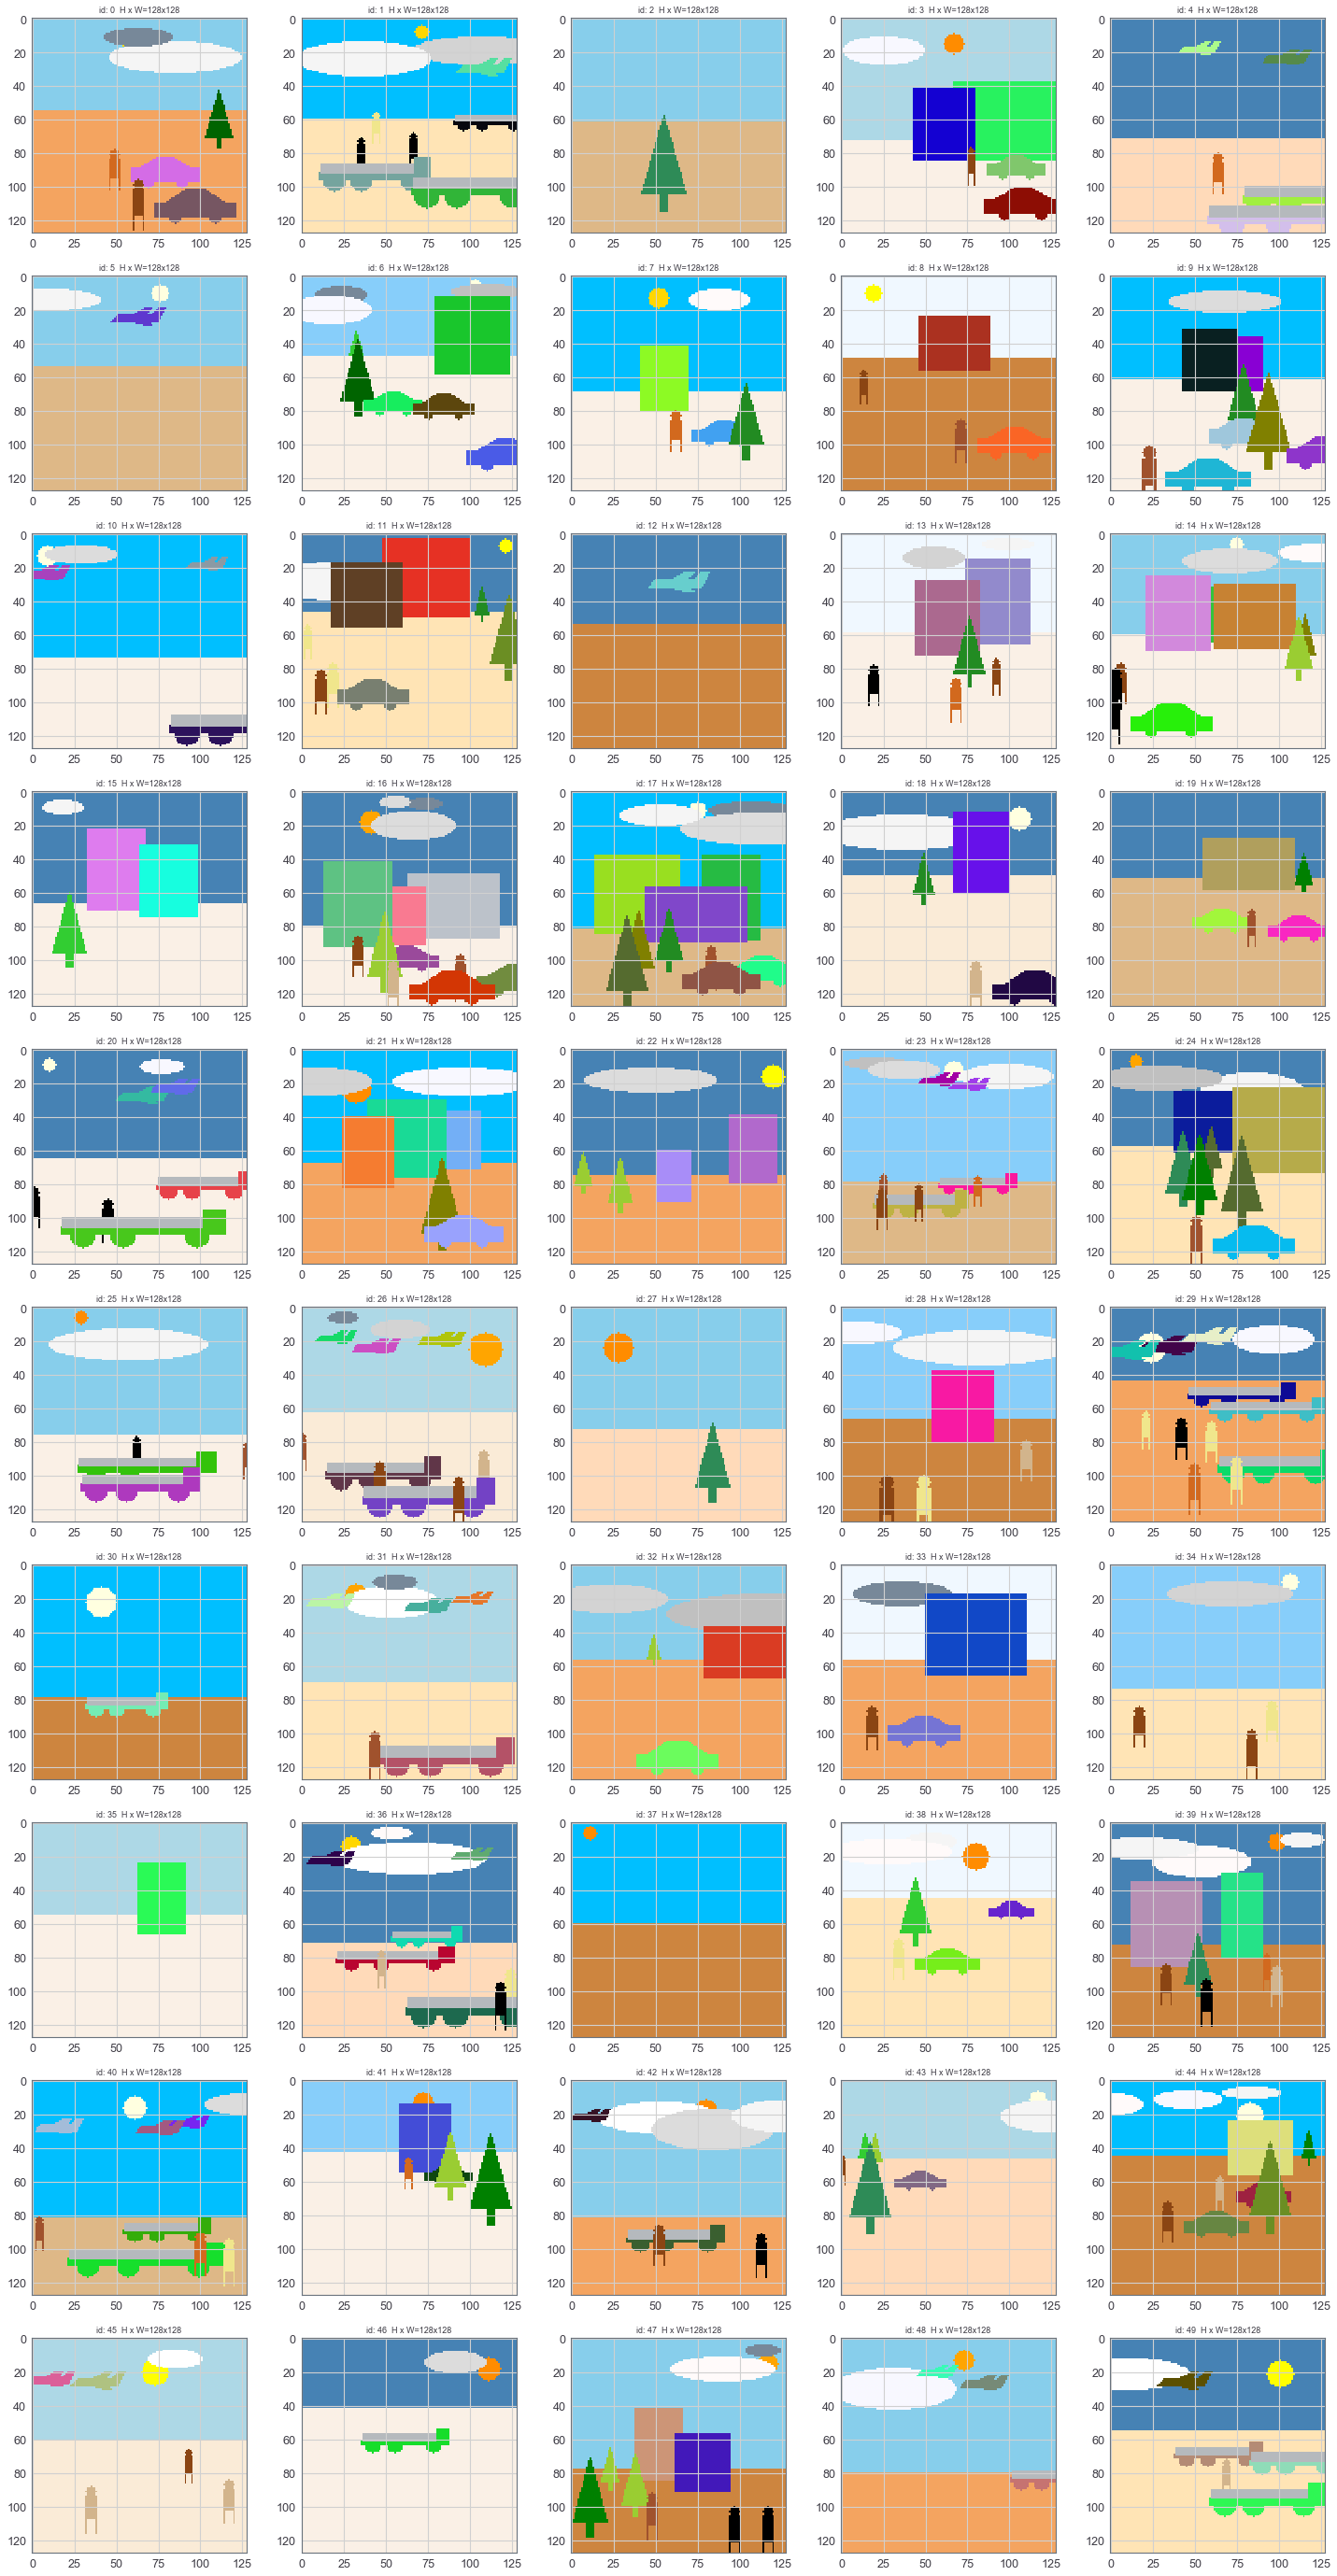

In [347]:
image_list = dataset_test.image_ids.tolist() ## [-4:]
dataset_test.display_image(image_list)

In [207]:
# image_list = dataset_test.image_ids.tolist()
# image_list = [170, 222, 258, 411, 413, 514, 595, 718, 884, 792, 760]
# image_list = [812, 859, 890, 901]
# for i, (shape, color, dim) in enumerate(dataset_test.image_info[IMAGE_ID]['shapes']):
#     print('{}  {}  {}  {} {} {} {} '.format(i, shape, dim, dim[1]-dim[3], dim[0]-dim[2], dim[1]+dim[3],   dim[0]+dim[2]))
IMAGE_ID = 9
image_list = [IMAGE_ID]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = [str(i) for i in image_list], cols = 1, width = 12)


IndexError: list index out of range


GT_BOXES for image  0
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  6 cloud              |  15   0  38  86    43.0   26.5  1978.00
  1  4 building           |  33  68  84  91    79.5   58.5  1173.00
  2  5 tree               |  64  91  92 104    97.5   78.0   364.00
  3  1 person             |  77  53  98  58    55.5   87.5   105.00
  4  5 tree               |  72 107 127 126   116.5   99.5  1045.00
  5  2 car                | 101  97 124 128   112.5  112.5   713.00
  6  1 person             |  96  84 127  91    87.5  111.5   217.00
  7  1 person             |  99  26 128  33    29.5  113.5   203.00



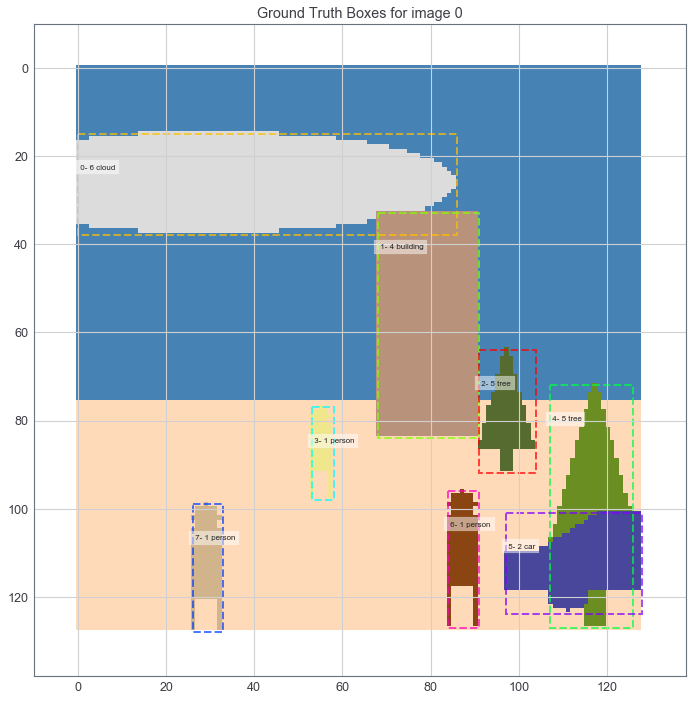

In [249]:
IMAGE_ID = 0
vis2.display_gt_bboxes(dataset_test, config, image_id = IMAGE_ID)

## Dev Code

### experiment `get_pairwise_occlusion_ratio()`

In [34]:
IMAGE_ID = 9
from mrcnn.Image import display_shapes
display_shapes(dataset_test.image_info[IMAGE_ID]['shapes'])


seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            23   34   61   82      58  42  24  19    (168.0, 100.0, 170.0)
 1 tree                38   49   84   59      54  61   5  23    [  0.0000 128.0000   0.0000]
 2 tree                37   66   73   74      70  55   4  18    [  0.0000 100.0000   0.0000]
 3 tree                39   25   99   39      32  69   7  30    [ 46.0000 139.0000  87.0000]
 4 car                 63   99   81  137     118  72  19   9    (126.0, 78.0, 153.0)
 5 car                104   33  132   91      62 118  29  14    (206.0, 77.0, 184.0)
 6 person              62   87   82   91      89  72   2  10    [240.0000 230.0000 140.0000]
 7 sun                 13   53   31   71      62  22   9   9    [255.0000 215.0000   0.0000]
 8 person             103   20  133   26      23 118   3  15    [210.0000 105.0000  30.0000]



In [43]:
from mrcnn.Image import order_shapes_by_bottom_edge
import copy

draw_priority_list = ['sun', 'cloud', 'airplane', 'person']
start = copy.copy(dataset_test.image_info[IMAGE_ID]['shapes'])
display_shapes(start)
mini = [start.index(i) for i in start if i[0] in draw_priority_list]
display_shapes(start)
print(mini)
# display_shapes(mini)

# srt = order_shapes_by_bottom_edge(mini)
# display_shapes(srt)

seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 building            23   34   61   82      58  42  24  19    (168.0, 100.0, 170.0)
 1 tree                38   49   84   59      54  61   5  23    [  0.0000 128.0000   0.0000]
 2 tree                37   66   73   74      70  55   4  18    [  0.0000 100.0000   0.0000]
 3 tree                39   25   99   39      32  69   7  30    [ 46.0000 139.0000  87.0000]
 4 car                 63   99   81  137     118  72  19   9    (126.0, 78.0, 153.0)
 5 car                104   33  132   91      62 118  29  14    (206.0, 77.0, 184.0)
 6 person              62   87   82   91      89  72   2  10    [240.0000 230.0000 140.0000]
 7 sun                 13   53   31   71      62  22   9   9    [255.0000 215.0000   0.0000]
 8 person             103   20  133   26      23 118   3  15    [210.0000 105.0000  30.0000]



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [157]:
import copy
OBJECT_TO_TEST = 0
other_shapes  = copy.copy(dataset_test.image_info[IMAGE_ID]['shapes'])

print('Image shapes: \n')
display_shapes(other_shapes)

new_shape = other_shapes.pop(OBJECT_TO_TEST)
print('new_shape: \n')
display_shapes([new_shape])

print('other_shapes: \n')
display_shapes(other_shapes)

# tst_arr = np.array([shp[2] for shp in other_shapes])
# print('tst_arr: ', tst_arr.shape)
# print(tst_arr)
# tst_arr2 = np.array([tst_arr[:,1]-tst_arr[:,3], tst_arr[:,0]-tst_arr[:,2], tst_arr[:,1]+tst_arr[:,3], tst_arr[:,0]+tst_arr[:,2]]).T
# print('tst_arr2: ', tst_arr2.shape)
# print(tst_arr2)
# print(np.array(tst_arr[:,1]-tst_arr[:,3],tst_arr[:,1]+tst_arr[:,3]).shape)

get_pairwise_occlusion_ratio(new_shape, other_shapes, True)


Image shapes: 

seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 sun                  4   80   12   88      84   8   4   4
 1 cloud                5   75   13  107      91   9  16   4
 2 airplane            14   94   26  126     110  20  16   6
 3 cloud               12    3   28   89      46  20  43   8
 4 airplane            24   96   38  132     114  31  18   7
 5 airplane            25   46   39   82      64  32  18   7
 6 cloud               18   -5   42   69      32  30  37  12
 7 truck               86   31  108   99      65  97  34  11
 8 person              86   23  112   27      25  99   2  13
 9 person              94   45  124   49      47 109   2  15
10 truck              100   17  126  127      72 113  55  13

new_shape: 

seq class_name         Y1   X1   Y2   X2      CX  CY  SX  SY 
-----------------------------------------------------------------
 0 sun                  4   80   12   88   

In [156]:
from mrcnn.Image import draw_object
##---------------------------------------------------------------------------------------------
## get_occlusion_ratio
##---------------------------------------------------------------------------------------------
def get_pairwise_occlusion_ratio( new_object, other_objects, verbose = False):
    '''
    a variation of load_masks customized to find objects that
    are completely hidden by other shapes
    '''
    np_format = {'int': lambda x: "%1d" % x}
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)
    
    height   = 128
    width    = 128
    new_shape, _, new_dims = new_object
    new_top  = new_dims[1] - new_dims[3]
    new_bot  = new_dims[1] + new_dims[3]
    new_left = new_dims[0] - new_dims[2]
    new_right= new_dims[0] + new_dims[2]
    
    ## get object_mask for shape
    new_object_mask   = np.zeros( [height, width], dtype=np.uint8)
    new_object_mask = np.expand_dims(draw_object(new_object_mask, new_shape, new_dims, 1), axis = -1)
    neg_new_object_mask = np.logical_not(new_object_mask)
    new_object_area = new_object_mask.sum()

    if verbose:
        print()
        print(' new_obj_mask_shape', new_object_mask.shape, ' New object area', new_object_area)
        print(' Newshape: ')
        print('        Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                    new_shape.upper(), new_dims[1], new_dims[0], new_top, new_bot, new_left, new_right, new_object_area, new_dims))
#     print(utils.mask_string(new_object_mask[:,:,0]))        
#     old_tp    = np.array([shp[2][1]-shp[2][3] for shp in other_objects])
#     old_bt    = np.array([shp[2][1]+shp[2][3] for shp in other_objects])
#     print('old_tp ', old_tp)
#     print('old_bt ', old_bt)
#     above_indexes = np.where(old_bt < new_top)
#     below_indexes = np.where(old_tp > new_bot)
#     print(' Aboves: ', above_indexes)
#     print(' Belows: ', below_indexes)
    

    old_count = len(other_objects)
    old_dims  = np.array([shp[2] for shp in other_objects] )
    old_shapes= np.array([shp[0] for shp in other_objects])
    
    old_top   = old_dims[:,1:2] - old_dims[:,3:]
    old_bot   = old_dims[:,1:2] + old_dims[:,3:]
    old_left  = old_dims[:,0:1] - old_dims[:,2:3]
    old_right = old_dims[:,0:1] + old_dims[:,2:3]
    old_boxes = np.hstack([old_top,old_left,old_bot,old_right])
    old_count = old_shapes.shape[0]
    
    
    ## get masks for existing shapes
    
    mask      = np.zeros( [height, width, old_count], dtype=np.uint8)
    for i, (shp, dim) in enumerate(zip(old_shapes, old_dims)):
        mask[:, :, i:i + 1] = draw_object(mask[:, :, i:i + 1].copy(), shp, dim, 1)
    neg_mask =np.logical_not(mask)
    old_object_area = mask.sum(axis = (0,1))    
    
    if verbose:
        print(' Number of previous objects :', old_count)
        for i in range(old_count):
            print('    {:2d}  Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                  i, old_shapes[i].upper(), old_dims[i,1],old_dims[i,0], 
                     old_boxes[i,0], old_boxes[i,2], old_boxes[i,1], old_boxes[i,3], old_object_area[i], old_dims[i]))
    
    # identify objects not affected by new object and drop them from occlusion calculations
    
    above_indexes = np.where(old_bot  < new_top)
    below_indexes = np.where(old_top  > new_bot)
    drop_indexes  = np.union1d(above_indexes[0], below_indexes[0]).astype(np.int)

    
    old_shapes = np.delete(old_shapes, drop_indexes, axis =0)
    old_boxes  = np.delete(old_boxes, drop_indexes, axis =0)
    old_dims   = np.delete(old_dims, drop_indexes, axis =0)
    mask       = np.delete(mask, drop_indexes, axis = -1)
    neg_mask   = np.logical_not(mask)
    old_object_area = mask.sum(axis = (0,1))    
    old_count  = old_shapes.shape[0]
    if verbose:
        print(' Aboves: ', above_indexes[0])
        print(' Belows: ', below_indexes[0])
        print(' drop_indexes: ', drop_indexes)
        print(' Trimmed old shaps info:', old_shapes.shape)
        print(' Trimmed old dims  info:', old_dims.shape)
        print(' Trimmed old boxes info:', old_boxes.shape)    
        print(' Trimmed old masks info:', mask.shape)    
        
    if verbose:
        print(' Number of other objects After removing irrelevant boxes :', old_count, ' Mask shape', mask.shape)
        for i in range(old_count):
            print('    {:2d}  Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                  i, old_shapes[i].upper(), old_dims[i,1], old_dims[i,0],
                  old_boxes[i,0], old_boxes[i,2], old_boxes[i,1], old_boxes[i,3], old_object_area[i], old_dims[i]))


    #----------------------------------------------------------------------------------
    #  apply occlusion_mask on object_mask and determine remaining area of object
    #-----------------------------------------------------------------------------------
    occluded1 = np.logical_and(neg_mask, new_object_mask)
    t_new_obj_non_occ_area = occluded1.sum(axis =(0,1))
    t_new_obj_non_occ_ratio= t_new_obj_non_occ_area / new_object_area
    t_new_obj_occ_ratio    = 1 - t_new_obj_non_occ_ratio
    
    occluded2 = np.logical_and(mask, neg_new_object_mask)
    t_old_obj_non_occ_area = occluded2.sum(axis =(0,1))
    t_old_obj_non_occ_ratio= t_old_obj_non_occ_area / old_object_area
    t_old_obj_occ_ratio    = 1 - t_old_obj_non_occ_ratio
    print()
    print(' OCCLUDED 1 SHAPE IS           : ', occluded1.shape)
    print(' NEW OBJECT- NON OCCLUDED AREAS: ', t_new_obj_non_occ_area)
    print(' NEW OBJECT- TOTAL AREA        : ', new_object_area)
    print(' NEW OBJECT- NON OCCLUDED RATIO: ', t_new_obj_non_occ_ratio)
    print(' NEW OBJECT- OCCLUDED RATIO    : ', t_new_obj_occ_ratio, type(t_new_obj_occ_ratio))
    
    print(' OCCLUDED 2 SHAPE IS           : ', occluded2.shape)
    print(' OLD OBJECT- NON OCCLUDED AREAS: ', t_old_obj_non_occ_area)
    print(' OLD OBJECT- TOTAL AREA        : ', old_object_area)
    print(' OLD OBJECT- NON OCCLUDED RATIO: ', t_old_obj_non_occ_ratio)
    print(' OLD OBJECT- OCCLUDED RATIO    : ', t_old_obj_occ_ratio, type(t_old_obj_occ_ratio))
    abv_objs = np.where(old_boxes[:,2]<=new_bot)[0]
    bel_objs = np.where(old_boxes[:,2] >new_bot)[0]
    print(' Objects above this new object: ', abv_objs )
    print(' Objects below this new object: ', bel_objs )
    
    print(' Occlusions by this object on above objs   :  ', t_old_obj_occ_ratio[abv_objs])
    print(' Occlusions by below objects on this object:  ', t_new_obj_occ_ratio[bel_objs])
    print()
    print(' Max occlusion b/w new and old objects     :  ', np.maximum(t_new_obj_occ_ratio, t_old_obj_occ_ratio))
    
#     return occ_ratio, object_mask
    return



### experiment non maximal suppression

In [14]:
IMAGE_ID = 4
dataset_test.image_info[IMAGE_ID]
# dataset_test.source_class_ids

{'bg_color': array([        48,         94,         81]),
 'ground': (65, 65, array([  222.0000,   184.0000,   135.0000])),
 'height': 128,
 'horizon': (65, 65, array([  135.0000,   206.0000,   250.0000])),
 'id': 4,
 'path': None,
 'shapes': [('person',
   array([  210.0000,   105.0000,    30.0000]),
   (115, 72, 1, 9)),
  ('tree', array([   85.0000,   107.0000,    47.0000]), (105, 99, 6, 27))],
 'source': 'newshapes',
 'width': 128}

In [184]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%1d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)

In [70]:
from mrcnn.Image import debug_non_max_suppression_2
pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
# boxes = []
# for shp in dataset_test.image_info[1]['shapes']:
#     x, y, sx, sy = shp[2]
#     boxes.append([y - sy, x - sx, y + sy, x + sx])

# pp.pprint(boxes)    
# N = len(boxes)
# print(' number of boxes ',N )

[ ('sun', array([  255.0000,   255.0000,     0.0000]), (54, 18, 7, 7)),
  ('airplane', (249.0, 70.0, 61.0), (81, 21, 16, 6)),
  ('airplane', (157.0, 202.0, 80.0), (62, 22, 16, 6)),
  ('cloud', array([  248.0000,   248.0000,   255.0000]), (17, 26, 33, 11)),
  ('cloud', array([  211.0000,   211.0000,   211.0000]), (87, 29, 36, 12)),
  ('person', array([    0.0000,     0.0000,     0.0000]), (47, 72, 1, 10)),
  ('truck', (184.0, 52.0, 158.0), (86, 74, 27, 9)),
  ('person', array([  240.0000,   230.0000,   140.0000]), (31, 80, 1, 11)),
  ('truck', (154.0, 253.0, 177.0), (50, 84, 30, 10)),
  ('person', array([    0.0000,     0.0000,     0.0000]), (25, 98, 2, 14)),
  ('person', array([    0.0000,     0.0000,     0.0000]), (118, 109, 2, 16)),
  ('person', array([  240.0000,   230.0000,   140.0000]), (114, 109, 2, 16))]


In [89]:
# keep_ixs =  debug_non_max_suppression_2(dataset_test.image_info[IMAGE_ID]['shapes'], 0.29, 1)

### experiment `find_hidden_shapes()`

In [50]:
from mrcnn.Image import draw_object
##---------------------------------------------------------------------------------------------
## find_hidden_shapes
##---------------------------------------------------------------------------------------------
def debug_find_hidden_shapes(shapes):
    '''
    A variation of load_masks customized to find objects that
    are completely hidden by other shapes
    
    1- create a mask for each object. same size as image, '1' where the object is present, 
      '0's everywhere else
    '''

    # print('\n Load Mask information (shape, (color rgb), (x_ctr, y_ctr, size) ): ')
    # p4.pprint(info['shapes'])
    hidden_shapes = []
    count  = len(shapes)
    mask   = np.zeros( [128, 128, count], dtype=np.uint8)
    
    ## get masks for each shape
    for i, (shape, _, dims) in enumerate(shapes):
        mask[:, :, i:i + 1] = draw_object(mask[:, :, i:i + 1].copy(), shape, dims, 1)
        print(' Shape {:2d}: {:15s}   Bottom: {:5d}   MaskSum: {}    dims:{}'.format(i,shape.upper(), dims[1]+dims[3],mask[:,:,i].sum(), dims))
    shapes_area = mask.sum(axis =(0,1))
    print(shapes_area.shape, shapes_area)
#         print(utils.mask_string(mask[:,:,i]))
    #----------------------------------------------------------------------------------
    #  Start with last shape as the occlusion mask
    #   Occlusion starts with the last object an list and in each iteration of the loop
    #   adds an additional  object. Pixes assigned to objects are 0. Non assigned pixels
    #   are 1
    #-----------------------------------------------------------------------------------
    occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
    print(' Last object (Occlusion)')
    print(utils.mask_string(occlusion))
    for i in range(count - 2, -1, -1):
        print(' Shape {:2d}: {:15s}   Sum: {}  {}'.format(i,shapes[i][0].upper(), mask[:,:,i].sum(), shapes_area[i]))
        print(utils.mask_string(mask[:,:,i]))
        mask[:, :, i] = mask[:, :, i] * occlusion
        non_occ_obj_area = mask[:,:,i].sum()
        non_occ_ratio = (non_occ_obj_area / shapes_area[i])

        print()
        print(' Shape {:2d}: {:15s}  [Mask[i] * Occlusion]: Orig area:{}  Non-occluded area: {}  Non_Occluded Ratio: {} '.format(i,
                                                    shapes[i][0],shapes_area[i],mask[:,:,i].sum(), 1-non_occ_ratio))
        print(utils.mask_string(mask[:,:,i]))
        print()
        occlusion = np.logical_and(occlusion, np.logical_not(mask[:, :, i]))
        print(' New Occlusion = Occlusion && NOT(Mask[i]):   sum of occluded areas so far: ',np.logical_not(occlusion).sum())
        print(utils.mask_string(occlusion))
        print()

        ##-------------------------------------------------------------------------------------
        ## if the shape has been completely occluded by other shapes, it's mask is all zeros.
        ## in this case np.any(mask) will return FALSE.
        ## For these completely hidden objects, we record their id in hidden []
        ## and later remove them from the  list of shapes
        ##-------------------------------------------------------------------------------------
        if ( ~np.any(mask[:,:,i]) ) :
            # print(' !!!!!!  Zero Mask Found !!!!!!' )
            hidden_shapes.append(i)

    # if len(hidden_shapes) > 0 :
        # print(' ===> Find Hidden Shapes() found hidden objects ')
        # p8.pprint(shapes)
        # print(' ****** Objects completely hidden are : ', hidden_shapes)
        # for i in hidden_shapes:
            # p8.pprint(shapes[i])
    return hidden_shapes





### experiment `get_max_occlusion()`

In [186]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%10d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)

In [215]:
IMAGE_ID = 9
# from mrcnn.Image import debug_non_max_suppression_2
# pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
# boxes = []
# print(dataset_test.image_info[IMAGE_ID]['shapes'][[0,3])
for idx, shp in enumerate(dataset_test.image_info[IMAGE_ID]['shapes']):
    x, y, sx, sy = shp[2]
    print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))
#     boxes.append([y - sy, x - sx, y + sy, x + sx])

# pp.pprint(boxes)    
# N = len(boxes)
# print(' number of boxes ',N )

new_shape    = dataset_test.image_info[IMAGE_ID]['shapes'][4]
other_shapes = [dataset_test.image_info[IMAGE_ID]['shapes'][i] for i in [0,1,2,3,5,6,7]]
print()
print(' new_shape: ')
shp = new_shape
x, y, sx, sy = shp[2]
print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))
print()
print('other_shapes: ')
for idx, shp in enumerate(other_shapes):
    x, y, sx, sy = shp[2]
    print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))


 0 sun                 10   91   24  105  (98, 17, 7, 7)
 1 airplane            17   79   29  111  (95, 23, 16, 6)
 2 airplane            18   93   32  129  (111, 25, 18, 7)
 3 airplane            24   -2   38   34  (16, 31, 18, 7)
 4 cloud               16   15   38  129  (72, 27, 57, 11)
 5 truck               67   35   83   83  (59, 75, 24, 8)
 6 truck               75   33   93   87  (60, 84, 27, 9)
 7 truck              100   43  128  127  (85, 114, 42, 14)

 new_shape: 
 7 cloud               16   15   38  129  (72, 27, 57, 11)

other_shapes: 
 0 sun                 10   91   24  105  (98, 17, 7, 7)
 1 airplane            17   79   29  111  (95, 23, 16, 6)
 2 airplane            18   93   32  129  (111, 25, 18, 7)
 3 airplane            24   -2   38   34  (16, 31, 18, 7)
 4 truck               67   35   83   83  (59, 75, 24, 8)
 5 truck               75   33   93   87  (60, 84, 27, 9)
 6 truck              100   43  128  127  (85, 114, 42, 14)


In [242]:
occ = debug_get_max_occlusion(new_shape, other_shapes, True)

====> get_max_occlusion()  - len(other_shapes) : 7
Other Shapes Info:  (7, 4)
[[        98         17          7          7]
 [        95         23         16          6]
 [       111         25         18          7]
 [        16         31         18          7]
 [        59         75         24          8]
 [        60         84         27          9]
 [        85        114         42         14]]
x1 (7, 1) y1 (7, 1)
boxes : (7, 4)
[[        10         91         24        105]
 [        17         79         29        111]
 [        18         93         32        129]
 [        24         -2         38         34]
 [        67         35         83         83]
 [        75         33         93         87]
 [       100         43        128        127]]
     Test :     [        16         15         38        129]   2508      cloud             CY/CX: 27  72  Top:  16   Bot:  38 
       $ against:
     Shape:  0  [        10         91         24        105]    196      sun    

In [241]:

def debug_compute_iou(box, boxes, box_area, boxes_area, verbose = False):
    """
    Calculates IoU of the given box with the array of the given boxes.
    box:                1D vector [y1, x1, y2, x2]
    boxes:              [boxes_count, (y1, x1, y2, x2)]
    box_area:           float. the area of 'box'
    boxes_area:         array of length boxes_count.

    Note: the areas are passed in rather than calculated here for
          efficency. Calculate once in the caller to avoid duplicate work.
    """
    # Calculate intersection areas
    y1 = np.maximum(box[0], boxes[:, 0])
    y2 = np.minimum(box[2], boxes[:, 2])
    x1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[3], boxes[:, 3])

    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    union = box_area + boxes_area[:] - intersection[:]
    iou = intersection / union  
    occlusion = intersection / box_area
    occlusion2= intersection / boxes_area

    if verbose:
        print('    Reference box : ', box)
        print()
        # print('      box[0]      : ', box[0],'  boxes[:,0] : ', boxes[:,0], ' y1 - np.max ', y1)
        # print('      box[2]      : ', box[2],'  boxes[:,2] : ', boxes[:,2], ' y2 - np.min ', y2)
        # print('      box[1]      : ', box[1],'  boxes[:,1] : ', boxes[:,1], ' x1 - np.max ', x1)
        # print('      box[3]      : ', box[3],'  boxes[:,3] : ', boxes[:,3], ' x2 - np.min ', x2)
        print('      areas       : ', boxes_area)
        print('      ious        : ', iou)
        print('      intersection: ', intersection)
        print('      union       : ', union)
        print('      occlusion   : ', occlusion)
        print('      occlusion2  : ', occlusion2)

    return iou, intersection, union, occlusion

def debug_get_max_occlusion(new_shape, other_shapes, verbose = False ):
    
    '''
    Determined occlusion between new_shape and existing shapes  
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    '''
    if verbose:
        print('====> get_max_occlusion()  - len(other_shapes) :', len(other_shapes))
    if len(other_shapes) == 0:
        return np.array([0], dtype=np.float)

    new_cx, new_cy, new_sx, new_sy = new_shape[2]
    new_box = np.array([new_cy - new_sy, new_cx - new_sx, new_cy + new_sy, new_cx + new_sx])
    new_class = new_shape[0]
    new_area = (new_box[2] - new_box[0]) * (new_box[3] - new_box[1]) 
    
    shape_inf= [shp[2] for shp in other_shapes] 
    classes  = [shp[0] for shp in other_shapes]
    shape_inf= np.array(shape_inf)
    print('Other Shapes Info: ', shape_inf.shape)
    print(shape_inf)
    y1 = shape_inf[:,1:2] - shape_inf[:,3:]
    y2 = shape_inf[:,1:2] + shape_inf[:,3:]
    x1 = shape_inf[:,0:1] - shape_inf[:,2:3]
    x2 = shape_inf[:,0:1] + shape_inf[:,2:3]
    print('x1', x1.shape, 'y1', y1.shape)
    boxes   = np.hstack([y1,x1,y2,x2])
    print('boxes :', boxes.shape)
    print(boxes)
    classes = np.array(classes)
    scores  = np.arange(len(boxes))
    areas = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1]) 
    
#     cy = boxes[:,0] + (boxes[:,2] - boxes[:,0]) //2
#     cx = boxes[:,1] + (boxes[:,3] - boxes[:,1]) //2
    cy = shape_inf[:,1]
    cx = shape_inf[:,0]
    if verbose:
        print('     Test :     {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(new_box, new_area, new_class, new_cy,new_cx, new_cy-new_sy, new_cy + new_sy))
        print('       $ against:')
        for box, cls, scr ,ar, y,x  in zip(boxes, classes, scores, areas, cy,cx): 
            print('     Shape: {:2d}  {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(scr, box, ar, cls, y , x, box[0], box[2]))

    # Compute clipped box areas
    clipped_boxes = np.zeros_like(boxes)
    clp_y1 = clipped_boxes[:,0] = np.maximum(boxes[:, 0], 0)    ## y1
    clp_x1 = clipped_boxes[:,1] = np.maximum(boxes[:, 1], 0)    ## x1
    clp_y2 = clipped_boxes[:,2] = np.minimum(boxes[:, 2], 128)  ## y2
    clp_x2 = clipped_boxes[:,3] = np.minimum(boxes[:, 3], 128)  ## x2
    clipped_areas = (clp_y2 - clp_y1) * (clp_x2 - clp_x1) 

    if verbose:
        print('====> After Clipping ')
        for box,cls,scr, ar, y, x in zip(clipped_boxes, classes, scores, clipped_areas, cy, cx):
            print('     Shape: {:2d}  {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(scr, box, ar, cls, y , x, box[0], box[2]))
#             print('     scr:', scr, '  ', box, '   ', ar, '    ', cls)
    
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
             
    # Compute IoU of the picked box with the rest
    # iou, inter, union, occlusion = debug_compute_iou(new_box, boxes, new_area, areas)
    iou, inter, union, occlusion = debug_compute_iou(new_box, clipped_boxes, new_area, clipped_areas, True)
    if verbose:
        print()
        print(' **  new shape : ',new_class,'     box:', new_box, '     area: ', new_area)
        print('           clsses: ', ''.join( [i.rjust(11) for i in classes]))
        print('               CX: ', cx)
        print('               CY: ', cy)
        print('            areas: ', areas )   
        print('              iou: ', iou)
        print('     intersection: ', inter)
        print('            union: ', union)
        print('        occlusion: ', occlusion)

    return occlusion


### experiment `get_occlusion_ratio()`

In [245]:
##---------------------------------------------------------------------------------------------
## get_occlusion_ratio
##---------------------------------------------------------------------------------------------
def get_occlusion_ratio(self, object, verbose = False):
    '''
    a variation of load_masks customized to find objects that
    are completely hidden by other shapes
    '''
    shape, _, dims = object
    object_mask   = np.zeros( [self.height, self.width], dtype=np.uint8)

    ## get object_mask for shape
    object_mask = draw_object(object_mask, shape, dims, 1)
    shape_area = object_mask.sum()

    if verbose:
        np_format = {'int': lambda x: "%1d" % x}
        np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)
        top  = dims[1]-dims[3]
        bot  = dims[1]+dims[3]
        left = dims[0]-dims[2]
        right= dims[0]+dims[2]
        print('     get_occ_ratio():  Shape: {:15s}   Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  shape_area: {:8.2f}    dims:{}'.format(
                    shape.upper(), top, bot, left, right, shape_area, dims))
        # print(mask_string(object_mask))        

    #----------------------------------------------------------------------------------
    #  apply occlusion_mask on object_mask and determine remaining area of object
    #-----------------------------------------------------------------------------------

    occluded_obj = object_mask * self.occlusion_mask
    occluded_obj_area = occluded_obj.sum()
    non_occ_ratio = (occluded_obj_area / shape_area)
    occ_ratio = 1.0 - non_occ_ratio

    # if verbose:
    #     print('     Shape: {:15s} occluded_object (= Mask[i] * Occlusion)  Orig area:{}  Area considering occlusions: {}'.format(shape,shape_area, occluded_obj_area))
    #     print('     Object Occlusion Ratio is : {:8.4f}   NonOcclusion ratio: {:8.4f}'.format(occ_ratio, non_occ_ratio))
    #     # print(mask_string(occluded_obj))
    #     print()

    return occ_ratio, object_mask




###  experiment with pop() and remove()

In [ ]:
from matplotlib      import colors
a = colors.to_rgba_array(colors.CSS4_COLORS['forestgreen'])[0,:3]
print(a, a.shape, type(a), a.dtype)
color = np.random.randint(0, 255, (3,), dtype = np.int32).astype(np.float32)
print(color, color.dtype)
a2 = (color[0], color[1], color[2])
print(a2, type(a2), type(a2[0]))
a3 = np.asscalar(color[0])
print(a3, type(a3), type(a3))

In [ ]:
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
x  = 73 
y  = 67 
sx = 11 
sy = 33
print(' Draw Tree')
print('    CX :', x, 'CY:', y , 'sx: ',sx , 'sy: ', sy)

for theta in [30, 45, 60,75, 80, 85, 87.5, 90]:
    sin_t = math.sin(math.radians(theta))

    ty = sy //3                # trunk length
    by = sy - ty               # body length
    tx = int((by/ sin_t)//5)   # trunk width
    bx = by / sin_t            # body width 
    points = np.array([[(x, y - by),                    ## top 
                        (x - bx, y + by),     ## left
                        (x + bx, y + by),     ## right 
                        ]], dtype=np.int32)
    print('   sin_t:', round(sin_t,4),'    Trunk Length : ', ty , 'Width: ', tx, ' Half Body Length :', by, '   Half Body Width: ', bx, '   points: ', points)
    print('   recatanglge :', x-tx,y+by,'   to  ', x+tx, y+by+ty)
# orde of points: top, left, right
# image = cv2.fillPoly(image, points, color)
# image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)

In [44]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    print(i)
    print('I ',i,' before :',bb)
    bb.remove(i)
    print('I ',i,' after  :', bb)

#     print(' bb is none:',  ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)
# i = 'b'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not (bb) is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

# i = 'z'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

z
I  z  before : ['z', 'b']
I  z  after  : ['b']


In [ ]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    while i in aa:
        aa.remove(i)
        print('removed ',i,' aa list is now', aa)

In [63]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

cc = [] 
for i in bb:
    while True:
        print('trying ',i)
        try:
            pos = aa.index(i)
        except ValueError:
            break
        else:
#             item = aa.pop(pos)
            cc.append(aa.pop(pos))
            print(' found in position ',pos,' - cc list is: ', cc, 'remaining list: ', aa)
print(sorted(cc))

print(' remaining list: ', aa)
cc = sorted(cc)
cc.extend(sorted(aa)[::-1])
print(' final cc: ', cc)

trying  z
 found in position  6  - cc list is:  ['z'] remaining list:  ['a', 'b', 'c', 'a', 'a', 'b', 'd']
trying  z
trying  b
 found in position  1  - cc list is:  ['z', 'b'] remaining list:  ['a', 'c', 'a', 'a', 'b', 'd']
trying  b
 found in position  4  - cc list is:  ['z', 'b', 'b'] remaining list:  ['a', 'c', 'a', 'a', 'd']
trying  b
['b', 'b', 'z']
 remaining list:  ['a', 'c', 'a', 'a', 'd']
 final cc:  ['b', 'b', 'z', 'd', 'c', 'a', 'a', 'a']


In [ ]:


a = [12, 15]
b = [0.5, 0.67, 1.25, 1.5, 1.75, 2]

random.shuffle(a)
print(a)
print(random.choice(b))

In [ ]:
max_y_dim        = 25
min_y_dim        = 15
ratio = random.choice([0.5, 0.75, 1.25, 1.5, 1.75, 2])
dim1 = np.array([random.randint(min_y_dim  , max_y_dim), min_y_dim, max_y_dim, 1], dtype = np.float)
dim2 = np.array([dim1[0] * ratio, min_y_dim * ratio, max_y_dim * ratio, ratio], dtype = np.float)
a = np.vstack([dim1, dim2])
print(ratio)
# print(dim1.shape, dim1)
# print(dim2.shape, dim2)
print(a.shape)
print(a)
np.random.shuffle(a)
print(a.shape)
print(a)
sx, min_sx, max_sx, rat_sx = a[0]
sy, min_sy, max_sy, rat_sy = a[1]
print(' SX ', sx, min_sx, max_sx, rat_sx)
print(' SY ', sy, min_sy, max_sy, rat_sy)

### experiment with meshgrid

In [ ]:
x_axis = np.arange(9)
y_axis = np.arange(5)
print(x_axis, y_axis)
# a = np.linspace(0,8,7)
xx, yy = np.meshgrid(x_axis, y_axis)
x_values = (xx -4) * 4
y_values = (yy -2) * 4
print(xx.shape)
print(xx)
print(x_values.shape)
print(x_values)
print(' y matrices')
print(yy.shape)
print(yy)
print(y_values.shape)
print(y_values)
points = [(0,2), (1,1), (3,1), (5,2), (6,0), (5,1), (6,1), (7,0), (8,0), (7,2), (5,2), (6,3), (5,3) , (0,2) ]
shape  = []
for x,y in points:
    shape.append((x_values[y,x], y_values[y,x]))
print(shape)    

### display images

In [ ]:
# image_list = dataset_test.image_ids.tolist()

# pp.pprint(dataset_test.image_info[1]['shapes'])
# image_list = [1]
image_list = [15,16,17,18,19,20,21,22,23,24]
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
# print(len(images))
# print(images[0].shape)
visualize.display_images(images, titles = image_titles, cols = 5, width = 25)

#### build, load and prepare dataset

In [ ]:
# Build shape dataset        -----------------------------------------------
# Training dataset
# generate 500 shapes 
# del dataset_train
dataset_test = newshapes.NewShapesDataset(config)
dataset_test.load_shapes(10,10)
dataset_test.prepare()

In [ ]:
print(dataset_test.active_class_ids)
print(dataset_test.active_class_info)
j = [dataset_test.active_class_info[i]['name'] for i in dataset_test.active_class_info]
print(j)

In [ ]:
# import pickle
# with open('newshapes_dataset.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
del dataset_test

with open("newshapes_dataset.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

In [ ]:
###  Display some images from dataset

image_list = list(range(0,10))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 1, width = 24)

In [ ]:
visualize.display_image_gt(dataset_test,mrcnn_config,8)
 

###  Display Images 

In [ ]:
for image_id in range(len(test.image_ids)):
    image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                    load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False) 
    print(gt_class_ids)
#     print(test.image_info[image_id])
#     for shape, color, dims in test.image_info[image_id]['shapes']:        
#         x, y, sx, sy = dims
#         print(' Shape : {:20s}     Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d}'.format(shape,x,y,sx, sy))            
#     print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
#     print(gt_boxes)
#     visualize.display_images([image], cols = 1, width = 8)                     
    visualize.display_instances(image, gt_boxes, gt_masks, gt_class_ids, test.class_names, figsize=(8, 8))
#     visualize.display_top_masks(image, gt_masks, gt_class_ids, test.class_names)
    

##  Develop different shapes

###  Construct a semi-random image 

In [ ]:
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
color = tuple([random.randint(0, 255) for _ in range(3)])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)
for i in range(5):
    shape , color, dims = semi_random_shape(img_h, img_w )
    image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

###  Display one image

In [ ]:
image_index = 3
image_id = test.image_ids[image_index]
image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False)
    
print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
print(gt_boxes)
print(gt_class_ids)
display_images([image], cols = 1, width = 6)
# draw_boxes(image, gt_boxes)    

### Experiemnt building shapes

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1           
    min_range_y = height //3
    max_range_y = 3 * height //4   ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)            


    min_height = 10
    max_height = 30
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
    #     sy = random.randint(min_height, max_height)
#     sx = random.randint(5,15)
    sx = sy //2 + 5

    image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)      
display_images([image], cols = 1, width = 8)

###  Automobile

[255 255 255]
    CX : 64  CY: 114      SX:  27 sy:  13
    Car Top(y):  101   Bottom(y) :  123  Left(x): 37  Right(x) :  91
    Half Car hgt:  13  Half Body height (body_y):  4  Half body width :  27
    wheel_x     :  13   wheel_r : 5
    Color: (24, 101, 173)


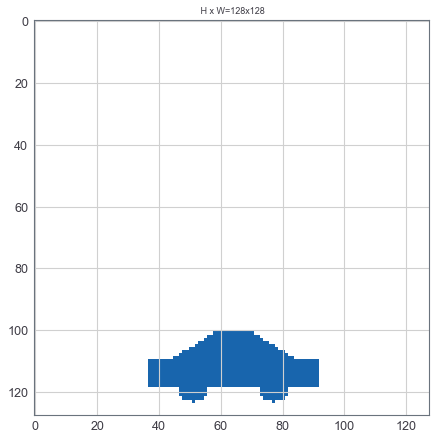

In [266]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]
for i in range(1):
    cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
#     color = tuple([random.randint(0, 255) for _ in range(3)])
#     min_range_x = buffer
#     max_range_x = width - buffer - 1
#     min_range_y = height //2
#     max_range_y = height - buffer - 1
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          
#     min_width = 12
#     max_width = 26     
    ## scale width based on location on the image. Images closer to the bottom 
    ## will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
    ## old method
    ## sx = random.randint(min_width , max_width)
#     sy = sx //2

    body_y  = sy //3
    wheel_x = sx //2
    wheel_r = sx //5
#     wheel_r = 2* sy // 5
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y): ', cy - sy , '  Bottom(y) : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x     : ', wheel_x, '  wheel_r :', wheel_r)
    print('    Color:', color)
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x , cy - sy),   (cx + top_x, cy - sy),
                (cx + bot_x,  cy - body_y),(cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

[255 255 255]
    CX : 60  CY: 5      SX:  14 sy:  7
    Car Top(y) :  -2   Bottom(y)   :  9  Left(x): 46  Right(x) :  74
    Cab top    :  -2   Cab bottom  :  3  Cab Height:  5
    Car height :  14   Half Car hgt:  7  Half Body height (body_y):  2  Half body width :  14
    wheel_x    :  7   wheel_r     :  2
    Color: (24, 101, 173)
    CX : 60  CY: 20      SX:  16 sy:  8
    Car Top(y) :  12   Bottom(y)   :  25  Left(x): 44  Right(x) :  76
    Cab top    :  12   Cab bottom  :  18  Cab Height:  6
    Car height :  16   Half Car hgt:  8  Half Body height (body_y):  2  Half body width :  16
    wheel_x    :  8   wheel_r     :  3
    Color: (24, 101, 173)
    CX : 60  CY: 40      SX:  18 sy:  9
    Car Top(y) :  31   Bottom(y)   :  46  Left(x): 42  Right(x) :  78
    Cab top    :  31   Cab bottom  :  37  Cab Height:  6
    Car height :  18   Half Car hgt:  9  Half Body height (body_y):  3  Half body width :  18
    wheel_x    :  9   wheel_r     :  3
    Color: (24, 101, 173)
    CX : 60

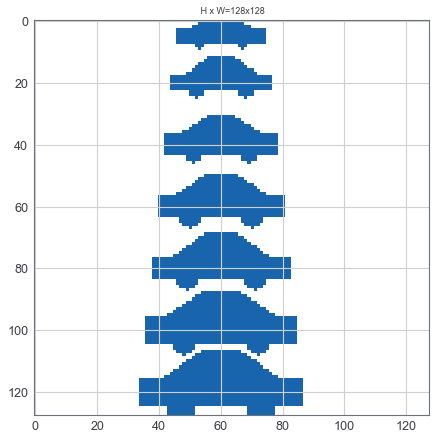

In [295]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]



min_y_dim = 7
max_y_dim = 15

sy_list = [ 7,  8, 9, 10, 11, 12,13]
cy_list = [ 5, 20, 40, 60, 80, 100,120]
cx_list = [60 for _ in sy_list]


for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = sy * 2
#     cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
    cx = cx_list[i]
    cy = cy_list[i]
#     color = tuple([random.randint(0, 255) for _ in range(3)])
#     min_range_x = buffer
#     max_range_x = width - buffer - 1
#     min_range_y = height //2
#     max_range_y = height - buffer - 1
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          
#     sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim   , max_y_dim]  ))
#     sx = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim*2 , max_y_dim*2] ))
#     min_width = 12
#     max_width = 26     
    ## scale width based on location on the image. Images closer to the bottom 
    ## will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
    ## old method
    ## sx = random.randint(min_width , max_width)
#     sy = sx //2
#     wheel_r = sx //5
#     body_y  = 3* sy // 5
    car_height = sy * 2
    body_y  = sy //3
    wheel_r = 2* sy // 5
    
    
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y) : ', cy - sy   , '  Bottom(y)   : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Cab top    : ', cy - sy   , '  Cab bottom  : ', cy - body_y , ' Cab Height: ', sy - body_y)
    print('    Car height : ', car_height, '  Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x    : ', wheel_x   , '  wheel_r     : ', wheel_r)
    print('    Color:', color)
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x,  cy - sy    ), (cx + top_x, cy - sy),
                        (cx + bot_x,  cy - body_y), (cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

[autoreload of mrcnn.Image failed: Traceback (most recent call last):
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 384, in superreload
    update_generic(old_obj, new_obj)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 323, in update_generic
    update(a, b)
  File "D:\Program Files\Anaconda3\envs\TF\lib\site-packages\IPython\extensions\autoreload.py", line 278, in update_class
    if old_obj == new_obj:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
]


[255 255 255]
    CX : 60  CY: 5      SX:  14 sy:  6
    Car Top(y) :  -1   Bottom(y)   :  9  Left(x): 46  Right(x) :  74
    Cab top    :  -1   Cab bottom  :  3  Cab Height:  4
    Car height :  22   Half Car hgt:  6  Half Body height (body_y):  2  Half body width :  14
    wheel_x    :  7   wheel_r     :  2
    Color: (24, 101, 173)
    CX : 60  CY: 20      SX:  16 sy:  7
    Car Top(y) :  13   Bottom(y)   :  24  Left(x): 44  Right(x) :  76
    Cab top    :  13   Cab bottom  :  18  Cab Height:  5
    Car height :  22   Half Car hgt:  7  Half Body height (body_y):  2  Half body width :  16
    wheel_x    :  8   wheel_r     :  2
    Color: (24, 101, 173)
    CX : 60  CY: 40      SX:  19 sy:  8
    Car Top(y) :  32   Bottom(y)   :  46  Left(x): 41  Right(x) :  79
    Cab top    :  32   Cab bottom  :  37  Cab Height:  5
    Car height :  22   Half Car hgt:  8  Half Body height (body_y):  3  Half body width :  19
    wheel_x    :  9   wheel_r     :  3
    Color: (24, 101, 173)
    CX : 60

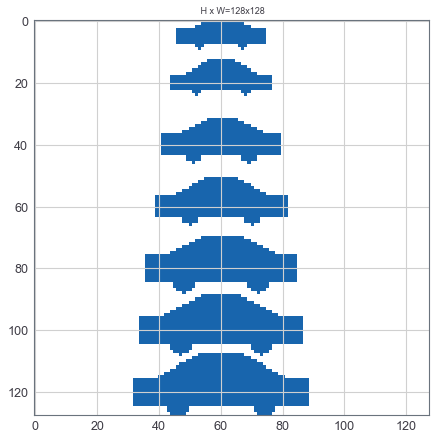

In [306]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]



min_y_dim = 7
max_y_dim = 15

# sy_list = [ 7,  8, 9, 10, 11, 12,13]
sy_list = [ 5,  6,  7 ,  8,  9, 10, 11]
cy_list = [ 5, 20, 40, 60, 80, 100,120]
cx_list = [60 for _ in sy_list]


for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = int(sy * 2.4)
#     cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
    cx = cx_list[i]
    cy = cy_list[i]

#     sy = sx //2
#     wheel_r = sx //5
#     body_y  = 3* sy // 5
    ttl_height = sy * 2
    body_y  = sy //3
    wheel_r = 2* sy // 5

    body_y  = int(2 * sy /5)
    wheel_r = int(2 * sy /5)
    
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y) : ', cy - sy   , '  Bottom(y)   : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Cab top    : ', cy - sy   , '  Cab bottom  : ', cy - body_y , ' Cab Height: ', sy - body_y)
    print('    Car height : ', car_height, '  Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x    : ', wheel_x   , '  wheel_r     : ', wheel_r)
    print('    Color:', color)
    
    
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x,  cy - sy    ), (cx + top_x, cy - sy),
                        (cx + bot_x,  cy - body_y), (cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

###  Truck

 sy_list: [         6          7          8          9         10         11         12         13]
 cy_list: [         7         22         38         54         70         86        102        118]
CX : 64 CY: 7 X to Y Ratio: 4      sx:  24 sy:  6 body_y  1  wheel_r : 4
CX : 64 CY: 22 X to Y Ratio: 2      sx:  12 sy:  6 body_y  1  wheel_r : 4
CX : 64 CY: 38 X to Y Ratio: 2      sx:  14 sy:  7 body_y  1  wheel_r : 4
CX : 64 CY: 54 X to Y Ratio: 4      sx:  32 sy:  8 body_y  1  wheel_r : 5
CX : 64 CY: 70 X to Y Ratio: 4      sx:  36 sy:  9 body_y  1  wheel_r : 6
CX : 64 CY: 86 X to Y Ratio: 3      sx:  30 sy:  10 body_y  2  wheel_r : 6
CX : 64 CY: 102 X to Y Ratio: 2      sx:  22 sy:  11 body_y  2  wheel_r : 7
CX : 64 CY: 118 X to Y Ratio: 4      sx:  52 sy:  13 body_y  2  wheel_r : 8


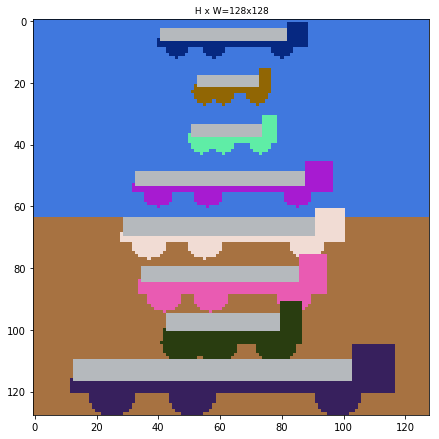

In [30]:
height , width = 128, 128
img_h, img_w = 128,128
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)

cab_color = tuple([random.randint(0, 255) for _ in range(3)])
horizon_line = 64
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

buffer    = 10
min_x_dim = 12
max_x_dim = 26     
min_y_dim = 6
max_y_dim = 13     
dflt_min_range_y = min_y_dim +1
# dflt_min_range_y = horizon_line  ## min_y_dim +1
dflt_max_range_y = height - 10 
min_range_x = buffer
max_range_x = width - buffer - 1
# min_range_y = buffer
# max_range_y = height - buffer - 1
min_range_y = dflt_min_range_y
max_range_y = dflt_max_range_y


sy_list = np.arange(min_y_dim, max_y_dim+1)
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list)).astype(np.int)
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)

for i in range(len(cy_list)):
# for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    cy = cy_list[i]
    cx = 64
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          

    ## scale width based on location on the image. Images closer to the bottom  will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
#     sy = sx //2
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    xy_ratio = random.randint(2,4)
    sx = sy * xy_ratio
#     sx = sy * 4
    
    body_y  = sy //5
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4
    wheel_r = 2 * sy //3
    cab_top_x = (3 * sx)//4

    print('CX :', cx, 'CY:', cy , 'X to Y Ratio:', xy_ratio, '     sx: ',sx , 'sy: ', sy, 'body_y ', body_y,' wheel_r :', wheel_r)

    ## cab
    image = cv2.rectangle(image, (cx + cab_top_x, cy -sy), (cx + sx, cy ), color, -1)  


    ## Rear Wheel 
    image = cv2.circle(image, (cx - (3*sx//4) , cy + body_y), wheel_r, color, -1)     
    image = cv2.circle(image, (cx - (  sx//4) , cy + body_y), wheel_r, color, -1)     
    ## Front Wheel
    image = cv2.circle(image, (cx + (2*sx//3) , cy + body_y ), wheel_r, color, -1)     
    ## Wheels - Older method
    #     image = cv2.circle(image, (cx - wheel_x , cy ), wheel_r, color, -1)     
    #     image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)     
    ## Front Wheel
    #     image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     

    ## lower bed
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)    
    ## Upper bed
    image = cv2.rectangle(image, (cx - sx+1, cy - (2*sy//3))  , (cx + cab_top_x -1, cy -body_y), (181,185,189), -1)

    
display_images([image], cols = 1, width = 8)

### Modern Airplane with interpolation of sy/sx based on cy/cx

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
horizon_line = 90
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

min_height  = 16
max_height  = 16
# sy = random.randint(min_height, max_height)            
# sx = sy
min_y_dim = 4
max_y_dim = 10
sy = 4
sx = 8   ## Half of height and width
step_sz = 2

## height  = sy * step_sz
## width   = sx * step_sz
## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
## sy, sx = 16, 32   ## Half of height and width
# x_rng = np.arange( -sx , (sx + 1)) * step_sz
# y_rng = np.arange( -sy , (sy + 1)) * step_sz
# x_values, y_values = np.meshgrid(x_rng, y_rng)
# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

# point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,5), (3,6), (3,5), (2,3) ]
# , (2,5), (3,6), (3,5)
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]
# (4,10), (6,12), (6,10)
# point_list_16_by_8 = [(4,-8), (2,-6), (2,-2), (0,2), (0,4), (2,2), (2,4), (0,6), (0,8), (4,6),  (4,8) ]


min_y_dim = 3
max_y_dim = 10
dflt_min_range_y = min_y_dim +1
dflt_max_range_y = horizon_line - 10 
dflt_min_range_x = 0   # self.config.Min_X[shape]
dflt_max_range_x = width  #    self.config.Max_X[shape]
min_range_x      = dflt_min_range_x
max_range_x      = dflt_max_range_x



sy_list = np.arange(min_y_dim, max_y_dim+1)
# cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list))
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)
for i in range(len(cy_list)):


# for i in range(6):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    ## interpolation of sy/sx based on cy/cx
    #     min_range_x = sx
    #     max_range_x = width - sx           
    #     min_range_y = sy
    #     max_range_y = height - sy
    
    min_range_y = dflt_min_range_y
    max_range_y = dflt_max_range_y #
    cy = cy_list[i]
#     cy = random.randint(min_range_y, max_range_y)
#     cx = 64
    cx = random.randint(min_range_x, max_range_x)
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    sx = sy * 8//3
    step_sz = sy / 4
    
    print('   Build between Y      : [',      min_range_y,     max_range_y, ']               X: [', min_range_x, max_range_x, ']' )
    print('   interpolation range Y: [', dflt_min_range_y, dflt_max_range_y,']   Min / Max Dim: [', min_y_dim, max_y_dim, ']  CY:', cy, 'SY: ', sy)
    print('   Step Size            : ', step_sz, '    sy: ', sy , '  sx:', sx)
    print('   Final (cx,cy,sx,sy)  : ', cx,cy,sx,sy)
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('      x_rng:  ', x_rng)
    print('              ', x_rng+cx)
    print('      y_rng:  ', y_rng)
    print('              ', y_rng+cy)
    x_values += cx
    y_values += cy
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
#     print('x_values adjusted for CX: ', cx)
#     print(x_values.shape)
#     print(x_values)
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points = [(x_values[i,j], y_values[i,j]) for (i,j) in point_list_16_by_8]
    points = np.array([points], dtype=np.int32)
#     print(' points list ')
#     print(points)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

### Trees

In [ ]:
import cv2
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
sin60 = math.sin(math.radians(60))

image = np.ones([height, width, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer  
    max_range_x = width - (buffer) - 1           
    min_range_y = height // 3
    max_range_y = width - (buffer) - 1    ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_height = 8
    max_height = 24
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
#     sy = random.randint(min_height, max_height)            
    sx = sy
    
    ty = sy //3            # trunk length - 1/3 total length 
    by = sy - ty           # body length  ~ 2/3 total length
    tx = int((by /sin60)//5)   # trunk width
#    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
    # orde of points: top, left, right
    points = np.array([[(x, y - by),
                        (x - (by / sin60), y + by),
                        (x + (by / sin60), y + by),
                        ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
    image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

### Modern Airplane

In [ ]:
    np_format = {}
    np_format['float'] = lambda x: "%6.2f" % x
    np_format['int']   = lambda x: "%4d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

Step Size  0.75 sy: 3 sx: 6  sy*step_sz: 2.25  sx*step_sz: 4.5
      x_rng:   [-6.0000 -5.2500 -4.5000 -3.7500 -3.0000 -2.2500 -1.5000 -0.7500  0.0000  0.7500  1.5000  2.2500  3.0000  3.7500  4.5000  5.2500  6.0000  6.7500]
      y_rng:   [-3.0000 -2.2500 -1.5000 -0.7500  0.0000  0.7500  1.5000  2.2500  3.0000  3.7500]
x_values adjusted for CX:  64
(10, 18)
[58.0000 58.7500 59.5000 60.2500 61.0000 61.7500 62.5000 63.2500 64.0000 64.7500 65.5000 66.2500 67.0000 67.7500 68.5000 69.2500 70.0000 70.7500]
Step Size  1.0 sy: 4 sx: 8  sy*step_sz: 4.0  sx*step_sz: 8.0
      x_rng:   [-8.0000 -7.0000 -6.0000 -5.0000 -4.0000 -3.0000 -2.0000 -1.0000  0.0000  1.0000  2.0000  3.0000  4.0000  5.0000  6.0000  7.0000  8.0000]
      y_rng:   [-4.0000 -3.0000 -2.0000 -1.0000  0.0000  1.0000  2.0000  3.0000  4.0000]
x_values adjusted for CX:  64
(9, 17)
[56.0000 57.0000 58.0000 59.0000 60.0000 61.0000 62.0000 63.0000 64.0000 65.0000 66.0000 67.0000 68.0000 69.0000 70.0000 71.0000 72.0000]
Step Size  1.25

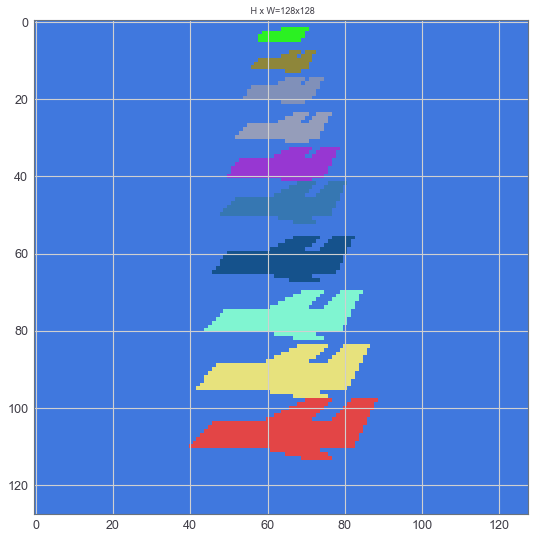

In [282]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
bg_color = np.array([  64,  120,  222])
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)


buffer = 20
min_height  = 16
max_height  = 16

cx = 40
cy = 40
## sy/sx : Half of height and width
step_sz = 2
sy = 14   ## height  = sy * step_sz
sx = 28   ## width   = sx * step_sz 
# sy = 15
# sx = 30
# sy =  13
# sx =  26
# sy = 3
# sx = 6
# sy = 4
# sx = 8


## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
x_rng = np.arange( -sx , (sx + 1)) * step_sz
y_rng = np.arange( -sy , (sy + 1)) * step_sz
x_values, y_values = np.meshgrid(x_rng, y_rng)

# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,3) ]
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]


sy_list = [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cx_list = [64 for _ in sy_list]


# for i in range(0.5,3 0.5):
# for i in np.linspace(3,3.5,2): #int(3.5//0.5)):
for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = sy * 2
    color = tuple([random.randint(0, 255) for _ in range(3)])
    step_sz = sy / 4
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('Step Size ', step_sz, 'sy:', sy,  'sx:', sx, ' sy*step_sz:', sy*step_sz,' sx*step_sz:',sx*step_sz)
    print('      x_rng:  ', x_rng)
    print('      y_rng:  ', y_rng)
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
    min_range_x = sx
    max_range_x = width - sx           
    min_range_y = sy
    max_range_y = height - sy
    cx = random.randint(min_range_x, max_range_x)
    cy = random.randint(min_range_y, max_range_y)  
    cx = cx_list[i]
    cy = cy_list[i]
    x_values += cx
    y_values += cy
    print('x_values adjusted for CX: ', cx)
    print(x_values.shape)
    print(x_values[0])
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points  = []
    for i,j in point_list_16_by_8:
#     for i,j in point_list_8_by_4:        
        points.append((x_values[i,j], y_values[i,j]))
#     print(' points list ')
#     print(points)
    points = np.array([points], dtype=np.int32)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

### Modern Airplane with interpolation of sy/sx based on cy/cx

 sy_list: [3 4 5 6 7 8 9 10]
 cy_list: [ 4.0000 14.8571 25.7143 36.5714 47.4286 58.2857 69.1429 80.0000]
   Build between Y      : [ 4 80 ]               X: [ 0 128 ]
   interpolation range Y: [ 4 80 ]   Min / Max Dim: [ 3 10 ]  CY: 4.0 SY:  3
   Step Size            :  0.75     sy:  3   sx: 8
   Final (cx,cy,sx,sy)  :  96 4.0 8 3
      x_rng:   [-8.0000 -7.2500 -6.5000 -5.7500 -5.0000 -4.2500 -3.5000 -2.7500 -2.0000 -1.2500 -0.5000  0.2500  1.0000  1.7500  2.5000  3.2500  4.0000  4.7500  5.5000  6.2500  7.0000  7.7500  8.5000]
               [ 88.0000  88.7500  89.5000  90.2500  91.0000  91.7500  92.5000  93.2500  94.0000  94.7500  95.5000  96.2500  97.0000  97.7500  98.5000  99.2500 100.0000 100.7500 101.5000 102.2500 103.0000
 103.7500 104.5000]
      y_rng:   [-3.0000 -2.2500 -1.5000 -0.7500  0.0000  0.7500  1.5000  2.2500  3.0000  3.7500]
               [1.0000 1.7500 2.5000 3.2500 4.0000 4.7500 5.5000 6.2500 7.0000 7.7500]
   Build between Y      : [ 4 80 ]               X: [ 0 1

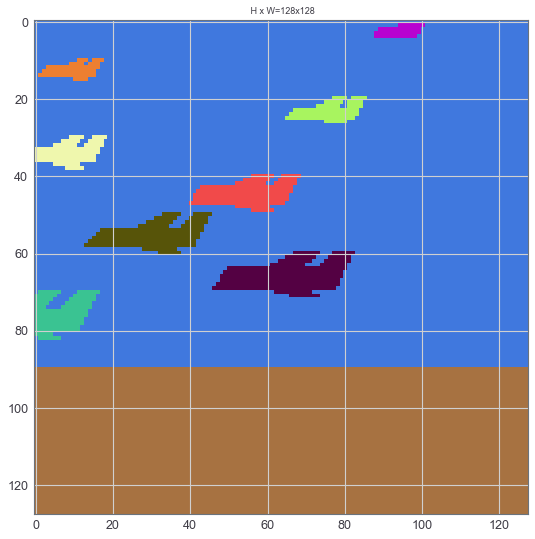

In [283]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
horizon_line = 90
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

min_height  = 16
max_height  = 16
# sy = random.randint(min_height, max_height)            
# sx = sy
min_y_dim = 4
max_y_dim = 10
sy = 4
sx = 8   ## Half of height and width
step_sz = 2

## height  = sy * step_sz
## width   = sx * step_sz
## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
## sy, sx = 16, 32   ## Half of height and width
# x_rng = np.arange( -sx , (sx + 1)) * step_sz
# y_rng = np.arange( -sy , (sy + 1)) * step_sz
# x_values, y_values = np.meshgrid(x_rng, y_rng)
# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,5), (3,6), (3,5), (2,3) ]
# , (2,5), (3,6), (3,5)
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]
# (4,10), (6,12), (6,10)
# point_list_16_by_8 = [(4,-8), (2,-6), (2,-2), (0,2), (0,4), (2,2), (2,4), (0,6), (0,8), (4,6),  (4,8) ]


min_y_dim = 3
max_y_dim = 10
dflt_min_range_y = min_y_dim +1
dflt_max_range_y = horizon_line - 10 
dflt_min_range_x = 0   # self.config.Min_X[shape]
dflt_max_range_x = width  #    self.config.Max_X[shape]
min_range_x      = dflt_min_range_x
max_range_x      = dflt_max_range_x



sy_list = np.arange(min_y_dim, max_y_dim+1)
# cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list))
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)
for i in range(len(cy_list)):


# for i in range(6):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    ## interpolation of sy/sx based on cy/cx
    #     min_range_x = sx
    #     max_range_x = width - sx           
    #     min_range_y = sy
    #     max_range_y = height - sy
    
    min_range_y = dflt_min_range_y
    max_range_y = dflt_max_range_y #
    cy = cy_list[i]
#     cy = random.randint(min_range_y, max_range_y)
#     cx = 64
    cx = random.randint(min_range_x, max_range_x)
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    sx = sy * 8//3
    step_sz = sy / 4
    
    print('   Build between Y      : [',      min_range_y,     max_range_y, ']               X: [', min_range_x, max_range_x, ']' )
    print('   interpolation range Y: [', dflt_min_range_y, dflt_max_range_y,']   Min / Max Dim: [', min_y_dim, max_y_dim, ']  CY:', cy, 'SY: ', sy)
    print('   Step Size            : ', step_sz, '    sy: ', sy , '  sx:', sx)
    print('   Final (cx,cy,sx,sy)  : ', cx,cy,sx,sy)
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('      x_rng:  ', x_rng)
    print('              ', x_rng+cx)
    print('      y_rng:  ', y_rng)
    print('              ', y_rng+cy)
    x_values += cx
    y_values += cy
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
#     print('x_values adjusted for CX: ', cx)
#     print(x_values.shape)
#     print(x_values)
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points = [(x_values[i,j], y_values[i,j]) for (i,j) in point_list_16_by_8]
    points = np.array([points], dtype=np.int32)
#     print(' points list ')
#     print(points)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

In [ ]:
print(bg_color)
print(np.linspace(0.5,3, int(3//0.5)))

###  Old Airplane

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20

min_range_x = buffer //3
max_range_x = width - (buffer//3) - 1           
min_range_y = height //3
max_range_y = 2* height // 3    ##* min_range_y
height   = 32
width    = 64
# height   = 16
# width    = 32
step     = 4
x_rng = np.arange( -width//2 ,  width//2 + 1, step)
y_rng = np.arange(-height//2 , height//2 + 1, step)
x_values, y_values = np.meshgrid(x_rng, y_rng)

print(x_rng, y_rng)
print('x_values: ',x_values.shape)
print(x_values)
print('y_values: ', y_values.shape)
print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3), (0,5), (0,6), (1,5), (1,6), (0,7), (0,8), (2,7), (2,5), (3,6), (3,5), (2,3) ]
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14),  (4,6) ]
# (4,10), (6,12), (6,10)
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)


for i in range(1):
    color = tuple([random.randint(0, 255) for _ in range(3)])
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)  
    cx = 40
    cy = 40
    sy = random.randint(min_height, max_height)            
    sx = sy
    x_values += cx
    y_values += cy
    print('x_values adjusted for CX: ', cx)
    print(x_values.shape)
    print(x_values)
    print('y_values adjusted for CY: ', cy)
    print(y_values.shape)
    print(y_values)
                  
    points  = []
    for i,j in point_list_16_by_8:
        points.append((x_values[i,j], y_values[i,j]))
    print(' points list ')
    print(points)
    points = np.array([points], dtype=np.int32)
    print(' points np.array ', points.shape)
    print(points)

### DRAW ------------------------------------------------    
#     sin60 = math.sin(math.radians(60))    
#     step = sx //2
#     tx = sx //3            # trunk length - 1/3 of total length 
#     bx = sx - tx           # body length
#     by = (bx/sin60)        # body width
#     ty = int(by//5)        # trunk width

    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
  
#     points = np.array([[(x - sx, y ),
#                         (x + bx , y - by),
#                         (x + bx , y + by),
#                         ]], dtype=np.int32)
# 
    # orde of points: top, left, right
#     points = np.array([[(x, y - by),
#                         (x - (by / sin60), y + by),
#                         (x + (by / sin60), y + by),
#                         ]], dtype=np.int32)
#     points = np.array([[(x - bx , y),
#                         (x + bx , y - by),
#                         (x + bx , y + by),
#                         ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
#     image = cv2.rectangle(image,(x+bx,y-ty), (x+bx+tx, y+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width =10)

###  person

In [ ]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1
    min_range_y = (height //2)
    max_range_y = height - buffer - 1
    min_height = 10
    max_height = 22
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)
#     sy = random.randint(min_height, max_height)
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height]) 
    sx = sy // 5   # body width 
    
### DRAW ------------------------------------------------    
    
    hy = sy // 4   # head height
    by = sy - hy   # body height
    print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy)
    
    # torso
    image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
    # legs
    image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
    image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
    #head
    image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)     

display_images([image], cols = 1, width = 6)

###  Ellipse

In [ ]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(3):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer//2 
    max_range_x = width - (buffer//2) - 1           
    min_range_y = buffer
    max_range_y = height //4
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_width , max_width  = 15, 40 
#     sx = random.randint(min_width, max_width)            
    sx = np.interp([y],[min_range_y, max_range_y], [min_width, max_width]) 
#     min_height ,max_height = 10, 20
#     sy = random.randint(min_height, max_height)            
    sy = sx //  random.randint(3, 5)
    
### DRAW ------------------------------------------------      
    
    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx)
    image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)

display_images([image], cols = 1, width = 6)

###  Routines that accept shape type and dimensions as inputs

In [ ]:
    
'''
-------------------------------------------------------------------------------
'''
def semi_random_image(self, height, width):
    '''
    Creates random specifications of an image with multiple shapes.
    Returns the background color of the image and a list of shape
    specifications that can be used to draw the image.
    '''
    # Pick random background color
    bg_color = np.array([random.randint(0, 255) for _ in range(3)])
    # Generate a few random shapes and record their
    # bounding boxes
    shapes = []
    boxes = []
    N = random.randint(1, 4)

    for _ in range(N):
        shape, color, dims = self.random_shape(height, width)
        shapes.append((shape, color, dims))
        x, y, sx, sy = dims
        boxes.append([y - sy, x - sx, y + sy, x + sx])

    # Suppress occulsions more than 0.3 IoU    
    # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
    keep_ixs = utils.non_max_suppression(np.array(boxes), np.arange(N), 0.3)

    shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]

    # print('Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
    return bg_color, shapes

def semi_random_shape(height, width, shape = None, x = 0, y = 0, sx = 0, sy = 0):
    """Generates specifications of a random shape that lies within
    the given height and width boundaries.
    Returns a tuple of three valus:
    * The shape name (square, circle, ...)
    * Shape color: a tuple of 3 values, RGB.
    * Shape dimensions: A tuple of values that define the shape size
                        and location. Differs per shape type.
    """
    # Shape
    if shape is None:
        shape = random.choice(["square", "circle", "triangle", "rectangle"])
    # Color
    color = tuple([random.randint(0, 255) for _ in range(3)])
    # Center x, y
    buffer = 20
    if y == 0:
        y = random.randint(buffer, height - buffer - 1)
    if x == 0: 
        x = random.randint(buffer, width - buffer - 1)
    # Size
    if sx == 0 :
        sx = random.randint(buffer, width // 4)
    if shape == "rectangle" and sy == 0 :
        sy = random.randint(buffer, height // 4)
    else:
        sy = sx
#     print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    return shape, color, (x, y, sx, sy)

def semi_draw_shape(image, shape, dims, color):
    """Draws a shape from the given specs."""
    # Get the center x, y and the size s
    x, y, sx, sy = dims
    print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    if shape == 'square':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)
    elif shape == 'rectangle':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        

    elif shape == "circle":
        image = cv2.circle(image, (x, y), sx, color, -1)

    elif shape == "triangle":
        sin60 = math.sin(math.radians(60))
        points = np.array([[(x, y - sx),
                            (x - (sx / sin60), y + sx),
                            (x + (sx / sin60), y + sx),
                            ]], dtype=np.int32)
#         print(' points.shape is : ',points.shape)
#         print(points)
        image = cv2.fillPoly(image, points, color)
    return image            

###  Non Max Suppression 

In [ ]:
from mrcnn.utils import compute_iou
def non_max_suppression(boxes, scores, threshold):
    """Performs non-maximum supression and returns indicies of kept boxes.
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    """
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
    # print(' non_max_suppression ')
    # Compute box areas
    y1 = boxes[:, 0]
    x1 = boxes[:, 1]
    y2 = boxes[:, 2]
    x2 = boxes[:, 3]
    area = (y2 - y1) * (x2 - x1)

    # Get indicies of boxes sorted by scores (highest first)
    ixs = scores.argsort()[::-1]

    pick = []
    print('====> Initial Ixs: ', ixs)
    while len(ixs) > 0:
        # Pick top box and add its index to the list
        i = ixs[0]
        cy = y1[i] + (y2[i]-y1[i])//2
        cx = x1[i] + (x2[i]-x1[i])//2
        print('     ix : ', ixs, 'ctr (x,y)', cx,' ',cy,' box:', boxes[i], ' compare ',i, ' with ', ixs[1:])
        pick.append(i)
        
        # Compute IoU of the picked box with the rest
        iou = compute_iou(boxes[i], boxes[ixs[1:]], area[i], area[ixs[1:]])
        print('     ious:', iou)
        # Identify boxes with IoU over the threshold. This
        # returns indicies into ixs[1:], so add 1 to get
        # indicies into ixs.
        tst =  np.where(iou>threshold)
        remove_ixs = np.where(iou > threshold)[0] + 1
        print('     np.where( iou > threshold) : ' ,tst, 'tst[0] (index into ixs[1:]: ', tst[0], 
         ' remove_ixs (index into ixs) : ',remove_ixs)
        
        # Remove indicies of the picked and overlapped boxes.
        ixs = np.delete(ixs, remove_ixs)
        ixs = np.delete(ixs, 0)
        print(' ending ixs (after deleting ixs[0]): ', ixs, ' picked so far: ',pick)
    print('====> Final Picks: ', pick)
    return np.array(pick, dtype=np.int32)



###  NewShape Class Definition

In [ ]:
class NewShapesConfig(ShapesConfig):
    '''
    Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    '''
    # Give the configuration a recognizable name
#     NAME = "shapes"

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # background + 3 shapes


class NewShapesDataset(Dataset):
    '''
    Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    '''

    def load_shapes(self, count, height, width):
        '''
        Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        '''
        
        # Add classes
        self.add_class("shapes", 1, "circle")  # used to be class 2
        self.add_class("shapes", 2, "square")  # used to be class 1
        self.add_class("shapes", 3, "triangle")
        self.add_class("shapes", 4, "rectangle")
        self.add_class("shapes", 5, "person")
        self.add_class("shapes", 6, "car")
        self.add_class("shapes", 7, "sun")
        self.add_class("shapes", 8, "building")
        self.add_class("shapes", 9, "tree")
        self.add_class("shapes",10, "cloud")

        # Add images
        # Generate random specifications of images (i.e. color and
        # list of shapes sizes and locations). This is more compact than
        # actual images. Images are generated on the fly in load_image().
        for i in range(count):
            bg_color, shapes = self.random_image(height, width)
            self.add_image("shapes", image_id=i, path=None,
                           width=width, height=height,
                           bg_color=bg_color, shapes=shapes)

    def load_image(self, image_id):
        '''
        Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but in this case it
        generates the image on the fly from the specs in image_info.
        '''
        
        info = self.image_info[image_id]
        bg_color = np.array(info['bg_color']).reshape([1, 1, 3])
        
        image = np.ones([info['height'], info['width'], 3], dtype=np.uint8)
        image = image * bg_color.astype(np.uint8)
        print(" Load Image ")
        pp.pprint(info['shapes'])

        #--------------------------------------------------------------------------------
        # rearrange the shapes by ascending Y, so that items closer to bottom of 
        # image overlay items further up
        #--------------------------------------------------------------------------------
        sort_lst = [itm[2][1] for itm in info['shapes']]
        sorted_shape_ind = np.argsort(np.array(sort_lst))
        
        for shape_ind in sorted_shape_ind:
#             print(' shape ind :', shape_ind, 'shape', shape, ' color:', color,' dims ',dims)
            shape, color, dims =  info['shapes'][shape_ind]
            image = self.draw_shape(image, shape, dims, color)
        return image

    
    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)    

            
    def load_mask(self, image_id):
        '''
        Generate instance masks for shapes of the given image ID.
        '''
        # print(' Loading shapes obj mask infofor image_id : ',image_id)
        info   = self.image_info[image_id]
        shapes = info['shapes']
        # print('\n Load Mask information (shape, (color rgb), (x_ctr, y_ctr, size) ): ')
        # pp.pprint(info['shapes'])
        count  = len(shapes)
        mask   = np.zeros([info['height'], info['width'], count], dtype=np.uint8)
        
        print(' Shapes obj mask shape is :',mask.shape)
        for i, (shape, _, dims) in enumerate(info['shapes']):
            mask[:, :, i:i + 1] = self.draw_shape(mask[:, :, i:i + 1].copy(), shape, dims, 1)
        
        # Handle occlusions
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(count - 2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(
                occlusion, np.logical_not(mask[:, :, i]))
        
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s[0]) for s in shapes])
        return mask, class_ids.astype(np.int32)
    
    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, sx, sy = dims
        print(' Shape : {:20s}   Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d} {}'.format(shape,x,y,sx, sy,color))        
        
        if shape == "square":
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)

        elif shape in ["rectangle", "building"]:
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        
#             print('X :', x, 'y:', y , '     sx: ',sx , 'sy: ', sy, 'hs:', hs)
        
        elif shape == "car":
            body_y = sy //3
            wheel_x = sx //2
            wheel_r = sx //5
            top_x   = sx //4
            bot_x   = 3*sx //4
            image = cv2.rectangle(image, (x - sx, y - body_y), (x + sx, y + body_y), color, -1)    
            image = cv2.circle(image, (x - wheel_x , y + body_y), wheel_r, color, -1)     
            image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     

            points = np.array([[(x - top_x , y - sy),   (x + top_x, y - sy),
                                (x + bot_x,  y - body_y),(x - bot_x, y - body_y), ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)                     
            
        elif shape == "person":
#             hy = sy // 4   # head height
#             by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)                         
#             image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by), color, -1)    
#             image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)            

            hy = sy // 4   # head height
            by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)            
            # torso
            image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
            # legs
            image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
            image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
            #head
            image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)           
        elif shape in ["circle", "sun"]:
            image = cv2.circle(image, (x, y), sx, color, -1)

        elif shape in ["cloud", "ellipse"]:
            image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)            

        elif shape == "triangle":
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - sx),
                                (x - (sx / sin60), y + sx),
                                (x + (sx / sin60), y + sx),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)
        
        elif shape == "tree":
            sin60 = math.sin(math.radians(60))
            ty = sy //3            # trunk length
            by = sy - ty           # body length
            tx = int((by /sin60)//5)   # trunk width
        #     print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - by),
                                (x - (by / sin60), y + by),
                                (x + (by / sin60), y + by),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)             
            image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)                      
            
        return image            

    def random_shape(self, shape, height, width):
        """Generates specifications of a random shape that lies within
        the given height and width boundaries.
        Returns a tuple of three valus:
        * The shape name (square, circle, ...)
        * Shape color: a tuple of 3 values, RGB.
        * Shape dimensions: A tuple of values that define the shape size
                            and location. Differs per shape type.
        """
        # Shape
#         shape = random.choice(["square", "circle", "triangle", "rectangle", "person", "car"])
        
        # Color
        color = tuple([random.randint(0, 255) for _ in range(3)])
        buffer = 20
        
        if shape == "person":
            min_range_x = buffer
            max_range_x = width - buffer - 1
#             min_range_y = (height //3) * 2
            min_range_y = (height //2)
            max_range_y = height - buffer - 1
            min_height = 10
            max_height = 22
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
#             sy = random.randint(min_height, max_height)
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            sx = sy //5    # body width 

        elif shape == "car":
#             min_range_x = buffer
#             max_range_x = width - buffer - 1
#             min_range_y = height //2
#             max_range_y = height - buffer - 1
#             min_width = 12
#             max_width = 15
#             x = random.randint(min_range_x, max_range_x)
#             y = random.randint(min_range_y, max_range_y)            
#             sx = random.randint(min_width , max_width)
#             sy = sx //3 

            min_range_x = buffer
            max_range_x = width - buffer - 1
            min_range_y = height //2
            max_range_y = height - buffer - 1

            min_width = 15
            max_width = 30 
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            ## scale width based on location on the image. Images closer to the bottom 
            ## will be larger
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
            ## old method
            ## sx = random.randint(min_width , max_width)            
            sy = sx //2            
            
        elif shape == "building":            
            min_range_x = buffer
            max_range_x = width - buffer - 1           
            min_range_y = height //3
            max_range_y = 3 * height //4   ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            min_height = 10
            max_height = 30
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            #     sy = random.randint(min_height, max_height)
            #     sx = random.randint(5,15)
            sx = sy //2 + 5            
            
        elif shape == "sun":
            min_range_x = buffer //3
            max_range_x = width - (buffer//3) - 1           
            min_range_y = buffer //3
            max_range_y = height //5    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 4
            max_height = 10
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
#             sx = random.randint(min_height, max_height)            
            sy = sx

        elif shape == "tree":
            min_range_x = buffer  
            max_range_x = width - (buffer) - 1           
            min_range_y = height // 3
            max_range_y = width - (buffer) - 1    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 8
            max_height = 24
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))    
            #     sy = random.randint(min_height, max_height)            
            sx = sy
                      
        elif shape == "cloud":               
            min_range_x = buffer//2 
            max_range_x = width - (buffer//2) - 1           
            min_range_y = buffer
            max_range_y = height //4
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_width , max_width  = 15, 40 
        #     sx = random.randint(min_width, max_width)            
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
        #     min_height ,max_height = 10, 20
        #     sy = random.randint(min_height, max_height)            
            sy = sx //  random.randint(3, 5)
                    
        else :
            min_range_x = buffer
            min_range_y = buffer
            max_range_x = width - buffer - 1
            max_range_y = height - buffer - 1
            min_size_x  = buffer
            max_size_x  = width // 4
            min_size_y  = buffer
            max_size_y  = height //4 

            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
            sx = random.randint(min_size_x, max_size_x)

            if shape == "rectangle":
                sy = random.randint(min_size_y, max_size_y)    
            else:
                ## other shapes have same sx and sy             
                sy = sx

        return  color, (x, y, sx, sy)
    
    def random_image(self, height, width):
        '''
        Creates random specifications of an image with multiple shapes.
        Returns the background color of the image and a list of shape
        specifications that can be used to draw the image.
        '''
        # Pick random background color
        bg_color = np.array([random.randint(0, 255) for _ in range(3)])

        # Generate a few random shapes and record their
        # bounding boxes
        tmp_shapes = []
        shapes = []
        boxes  = []
        N = random.randint(1, 7)
        shape_choices = ["person", "car", "sun", "building", "tree", "cloud"]
        
        for _ in range(N):
            shape = random.choice(shape_choices)            
            color, dims = self.random_shape(shape, height, width)
            tmp_shapes.append((shape, color, dims))
            if shape == "sun":
                shape_choices.remove("sun")
            x, y, sx, sy = dims
#             boxes.append([y - sy, x - sx, y + sy, x + sx])

        #--------------------------------------------------------------------------------
        # order shape objects based on closeness to bottom of image
        # this will result in items closer to the viewer have higher priority in NMS
        #--------------------------------------------------------------------------------
        print(" Random Image Routine ")
        pp.pprint(tmp_shapes)

        sort_lst = [itm[2][1] for itm in tmp_shapes]
        print(sort_lst)
        sorted_shape_ind = np.argsort(np.array(sort_lst))[::-1]
        print(sorted_shape_ind)
        
        for i in sorted_shape_ind:
            shapes.append(tmp_shapes[i])
            x, y, sx, sy = tmp_shapes[i][2]
            boxes.append([y - sy, x - sx, y + sy, x + sx])            
            
        print('=== Sahpes after sorting ===')
        pp.pprint(shapes)
        pp.pprint(boxes)
        # Suppress occulsions more than 0.3 IoU    
        # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
        # object scores (which dictate the priority) are assigned in the order they were created
        print('===== non-max-suppression =====')
        keep_ixs =  non_max_suppression(np.array(boxes), np.arange(N), 0.29)
        
        shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]
        
        print('===> Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
        return bg_color, shapes    
    
    

In [ ]:
def make_image():
    img = np.zeros((500, 500), np.uint8)
    black, white = 0, 255
    for i in range(6):
        dx = int((i%2)*250 - 30)
        dy = int((i/2.)*150)

        if i == 0:
            for j in range(11):
                angle = (j+5)*np.pi/21
                c, s = np.cos(angle), np.sin(angle)
                x1, y1 = np.int32([dx+100+j*10-80*c, dy+100-90*s])
                x2, y2 = np.int32([dx+100+j*10-30*c, dy+100-30*s])
                cv2.line(img, (x1, y1), (x2, y2), white)

        cv2.ellipse( img, (dx+150, dy+100), (100,70), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+100), (10,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+150), (40,10), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+27, dy+100), (20,35), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+273, dy+100), (20,35), 0, 0, 360, white, -1 )
    return img

# if __name__ == '__main__':
#     print(__doc__)

In [ ]:
    img = make_image()
    h, w = img.shape[:2]

    image, contours0, hierarchy = cv2.findContours( img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     print(contours0.shape)
    contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

    def update(levels):
        vis = np.zeros((h, w, 3), np.uint8)
        levels = levels - 3
        cv2.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),
            3, cv2.LINE_AA, hierarchy, abs(levels) )
        cv2.imshow('contours', vis)
    update(3)
    cv2.createTrackbar( "levels+3", "contours", 3, 7, update )
    cv2.imshow('image', img)
    cv2.waitKey()
    cv2.destroyAllWindows()